Source: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists

*A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment. This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision*.

Nazwa zmiennej          | opis
:---------------------- | :------------------------------------------------
enrollee_id             | Unique ID for candidate
city                    | City code
city_development_index  | Developement index of the city (scaled)
gender                  | Gender of candidate
relevent_experience     | Relevant experience of candidate
enrolled_university     | Type of University course enrolled if any
education_level         | Education level of candidate
major_discipline        | Education major discipline of candidate
experience              | Candidate total experience in years
company_size            | No of employees in current employer's company
company_type            | Type of current employer
lastnewjob              | Difference in years between previous job and current job
training_hours          | training hours completed
target                  | 0 – Not looking for job change, 1 – Looking for a job change

In [35]:
# import funkcji do stworzenia raportu
from IPython.display import display, Markdown

# import podstawowych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sp

%matplotlib inline

In [36]:
# EDA dla pliku trening: analiza targetu, korelacja z targetem, 
# rozkłady zmiennych względem targetu, feture importance.
# EDA dla porównania trening i test: rozkłady zmiennych, braki danych, 
# potencjalne unikalne kategorie, statystyki opisowe.

# Wczytanie plików

df_training = pd.read_csv("./data/aug_train.csv")
df_test = pd.read_csv("./data/aug_test.csv")

In [37]:
print(df_training.shape)
print('**********')
# wyświetlenie pierwszy pięciu obserwacji
print(df_training.head())
print('**********')
# wyświetlenie wszystkich kolumn
print(df_training.columns.tolist())
print('**********')
# wyświetlenie typów danych
print(df_training.dtypes)
print('**********')
# Info o kompletności danych
print(df_training.info())
print('**********')
# Sprawdzenie brakujących wartości
print(df_training.isnull().sum())
print('**********')

(19158, 14)
**********
   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   


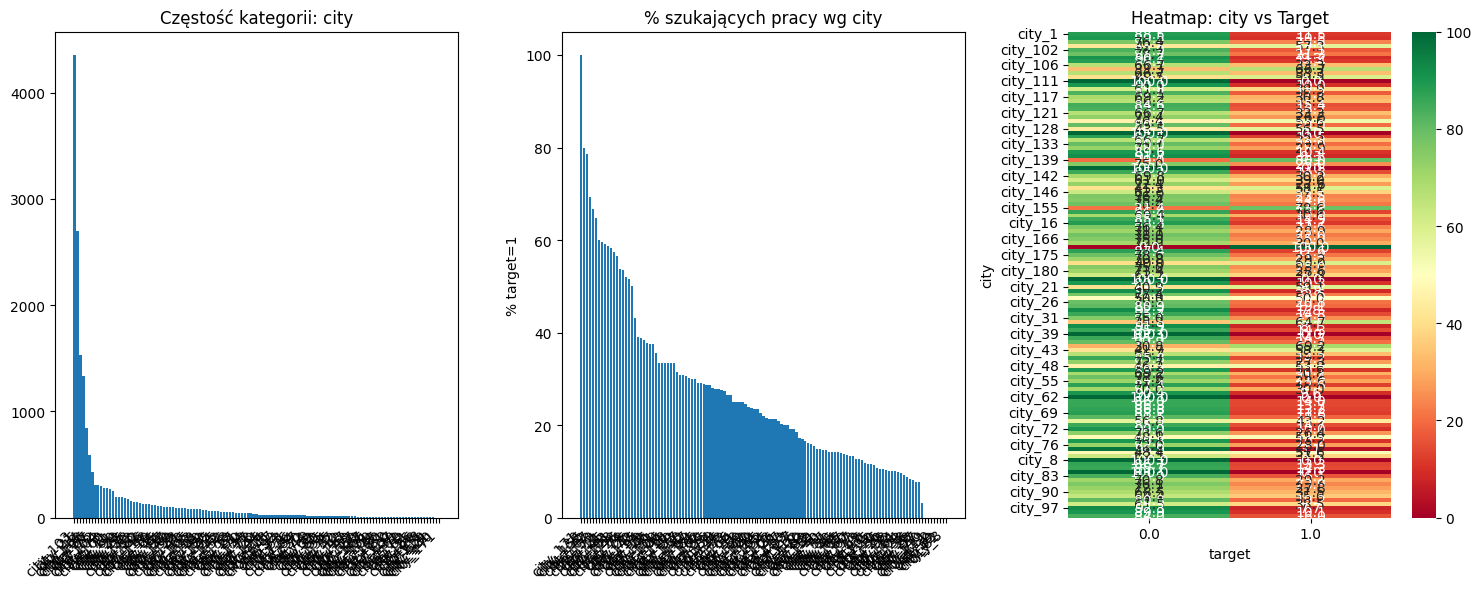


== Analiza city ==
Liczba unikalnych wartości: 123
Procent braków: 0.00%

Top 5 kategorii z najwyższym % target=1:
              mean  count
city                     
city_171  1.000000      1
city_139  0.800000      5
city_155  0.785714     14
city_42   0.692308     13
city_107  0.666667      6


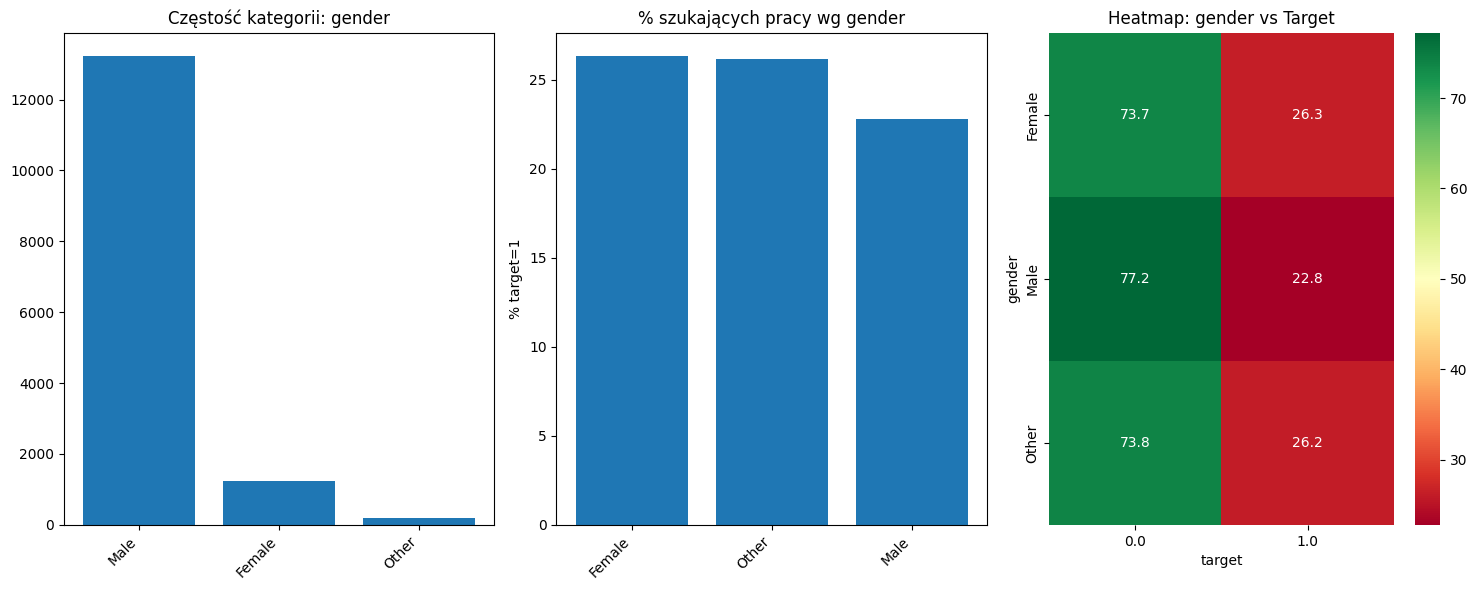


== Analiza gender ==
Liczba unikalnych wartości: 3
Procent braków: 23.53%

Top 5 kategorii z najwyższym % target=1:
            mean  count
gender                 
Female  0.263328   1238
Other   0.261780    191
Male    0.227819  13221


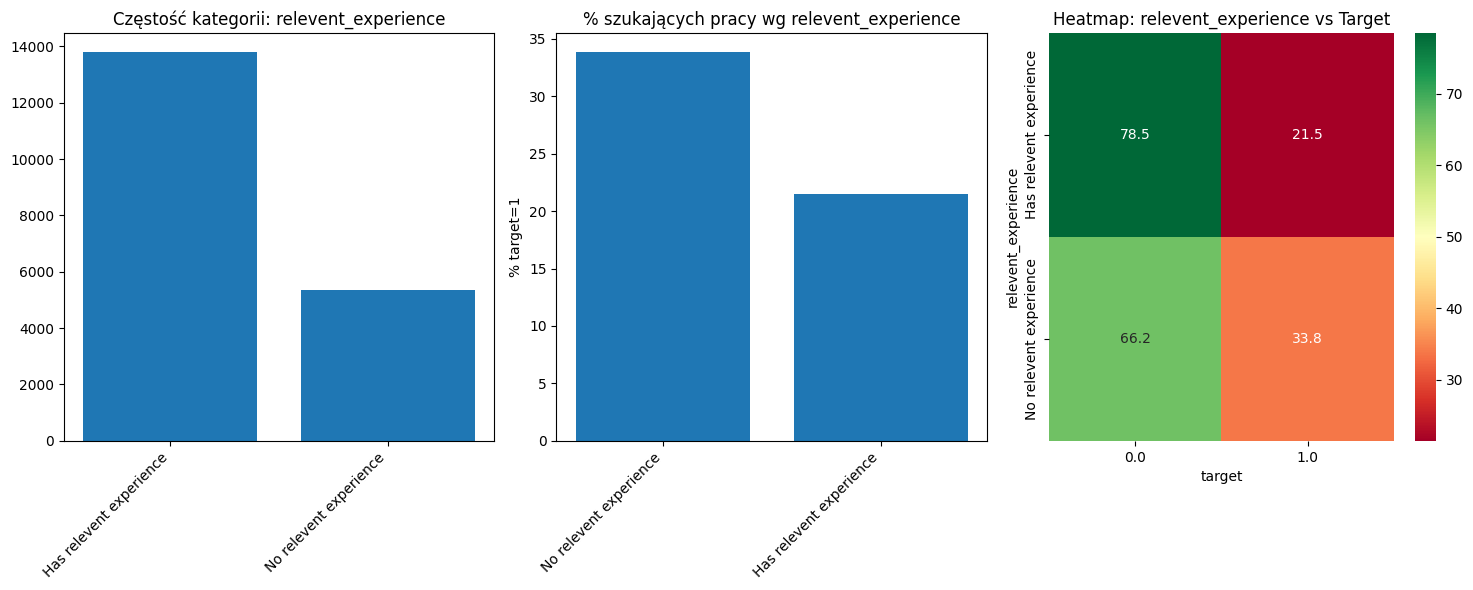


== Analiza relevent_experience ==
Liczba unikalnych wartości: 2
Procent braków: 0.00%

Top 5 kategorii z najwyższym % target=1:
                             mean  count
relevent_experience                     
No relevent experience   0.338427   5366
Has relevent experience  0.214690  13792


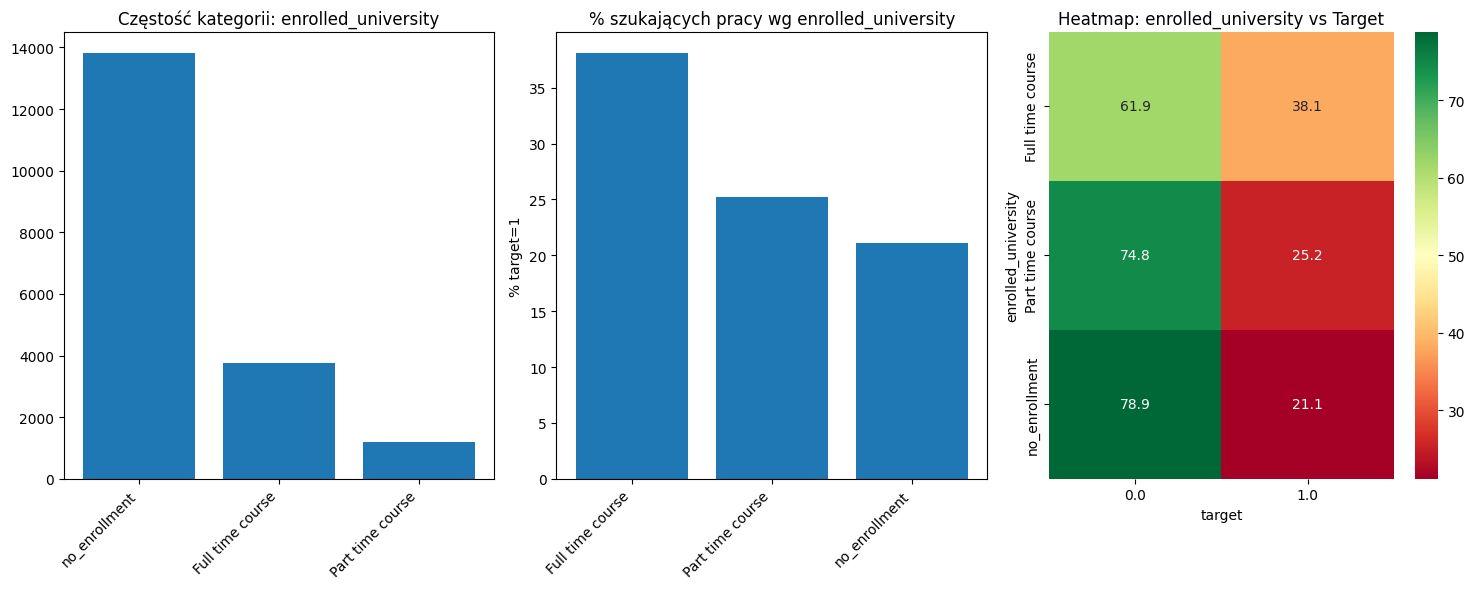


== Analiza enrolled_university ==
Liczba unikalnych wartości: 3
Procent braków: 2.01%

Top 5 kategorii z najwyższym % target=1:
                         mean  count
enrolled_university                 
Full time course     0.380889   3757
Part time course     0.252087   1198
no_enrollment        0.211406  13817


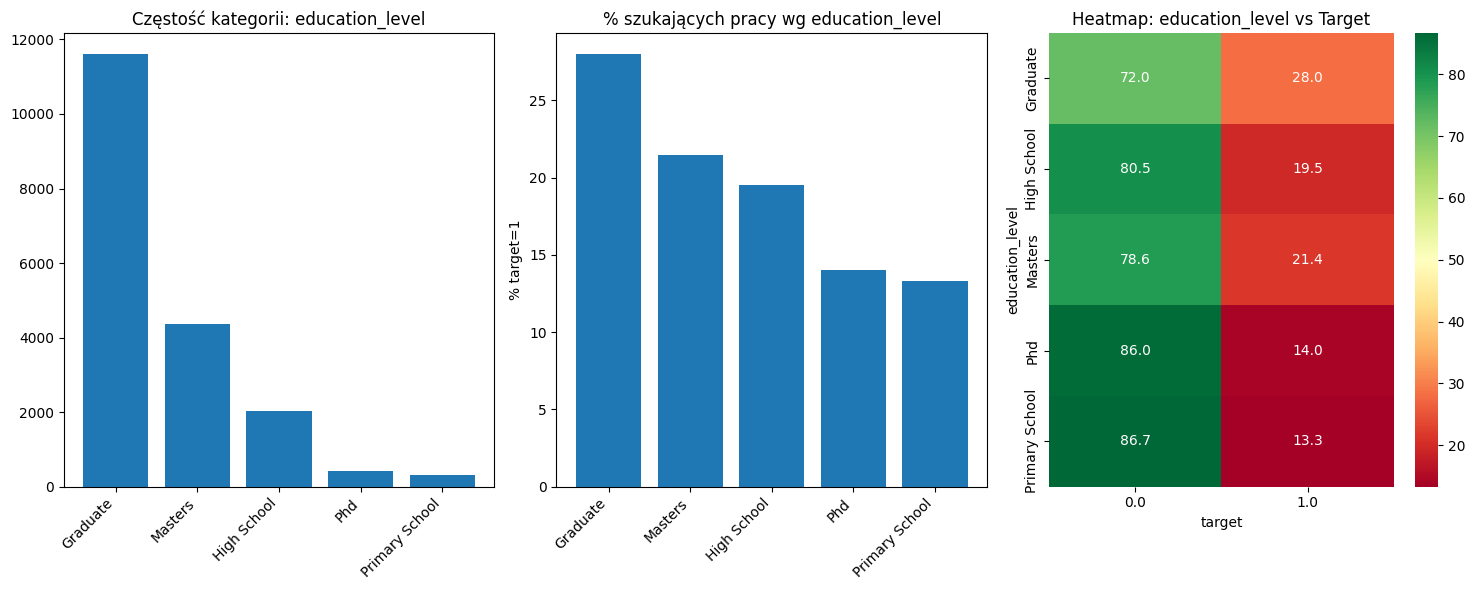


== Analiza education_level ==
Liczba unikalnych wartości: 5
Procent braków: 2.40%

Top 5 kategorii z najwyższym % target=1:
                     mean  count
education_level                 
Graduate         0.279790  11598
Masters          0.214400   4361
High School      0.195340   2017
Phd              0.140097    414
Primary School   0.133117    308


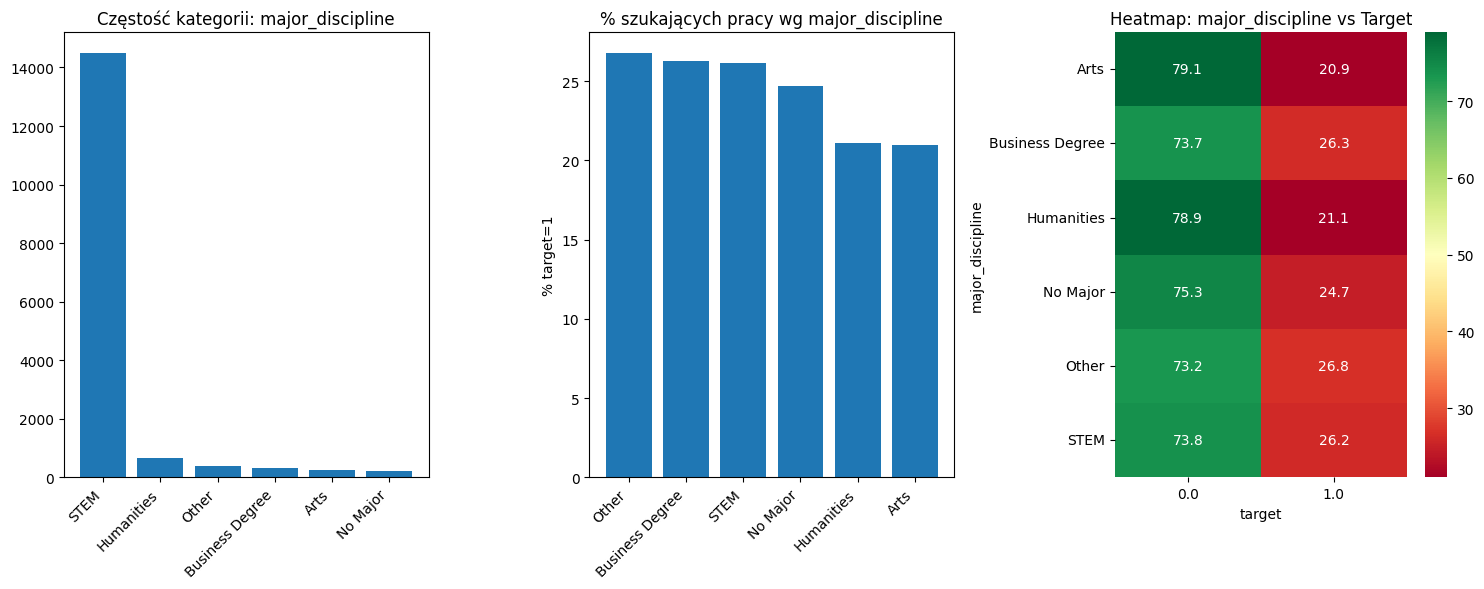


== Analiza major_discipline ==
Liczba unikalnych wartości: 6
Procent braków: 14.68%

Top 5 kategorii z najwyższym % target=1:
                      mean  count
major_discipline                 
Other             0.267717    381
Business Degree   0.262997    327
STEM              0.261593  14492
No Major          0.246637    223
Humanities        0.210762    669


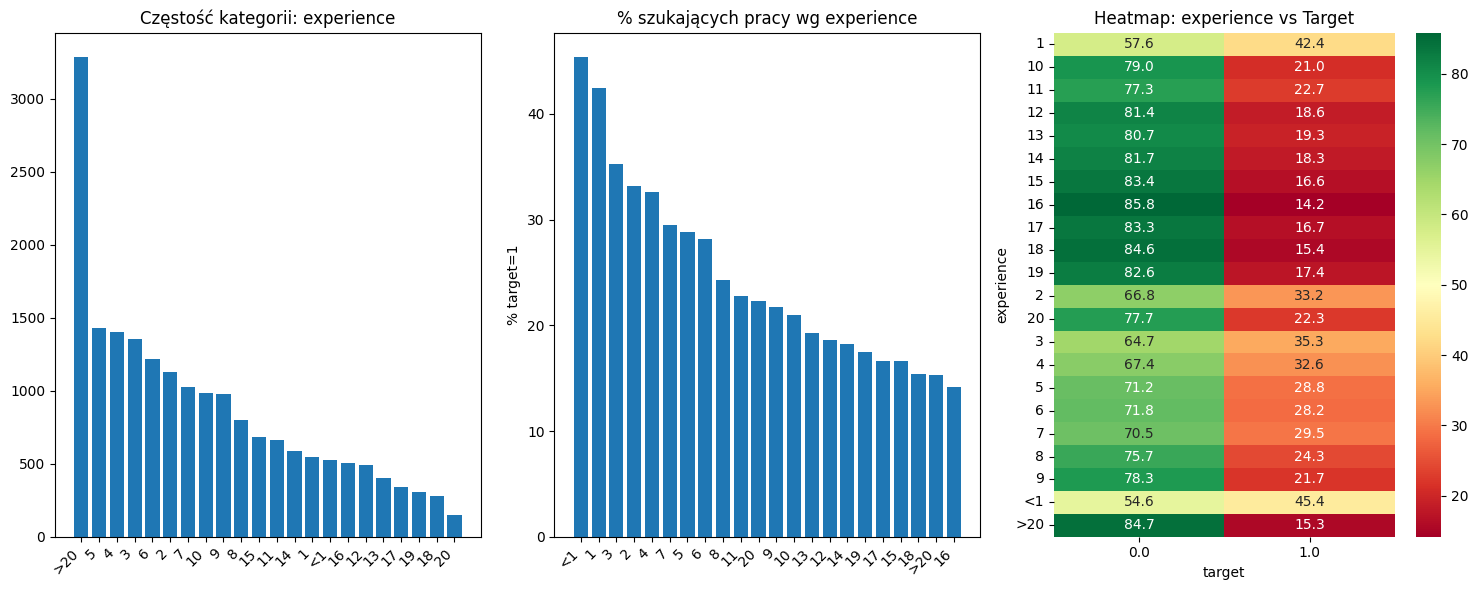


== Analiza experience ==
Liczba unikalnych wartości: 22
Procent braków: 0.34%

Top 5 kategorii z najwyższym % target=1:
                mean  count
experience                 
<1          0.454023    522
1           0.424408    549
3           0.353028   1354
2           0.331854   1127
4           0.325731   1403


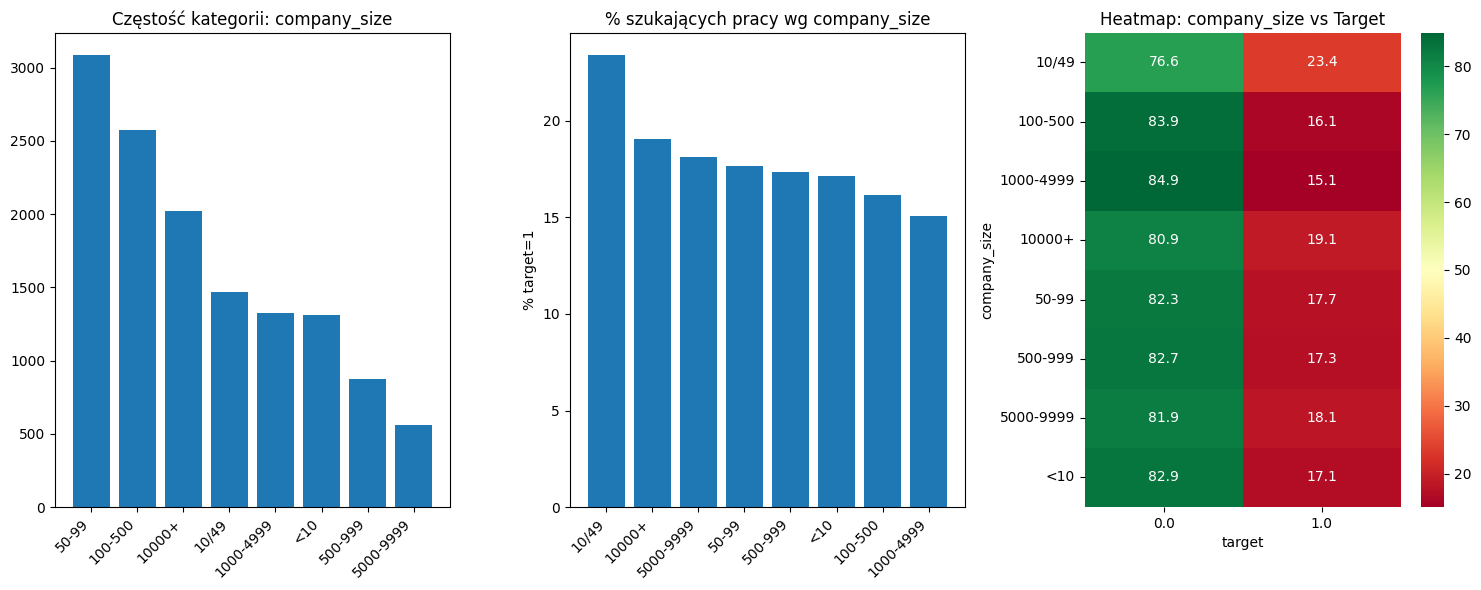


== Analiza company_size ==
Liczba unikalnych wartości: 8
Procent braków: 30.99%

Top 5 kategorii z najwyższym % target=1:
                  mean  count
company_size                 
10/49         0.233855   1471
10000+        0.190688   2019
5000-9999     0.181172    563
50-99         0.176776   3083
500-999       0.173318    877


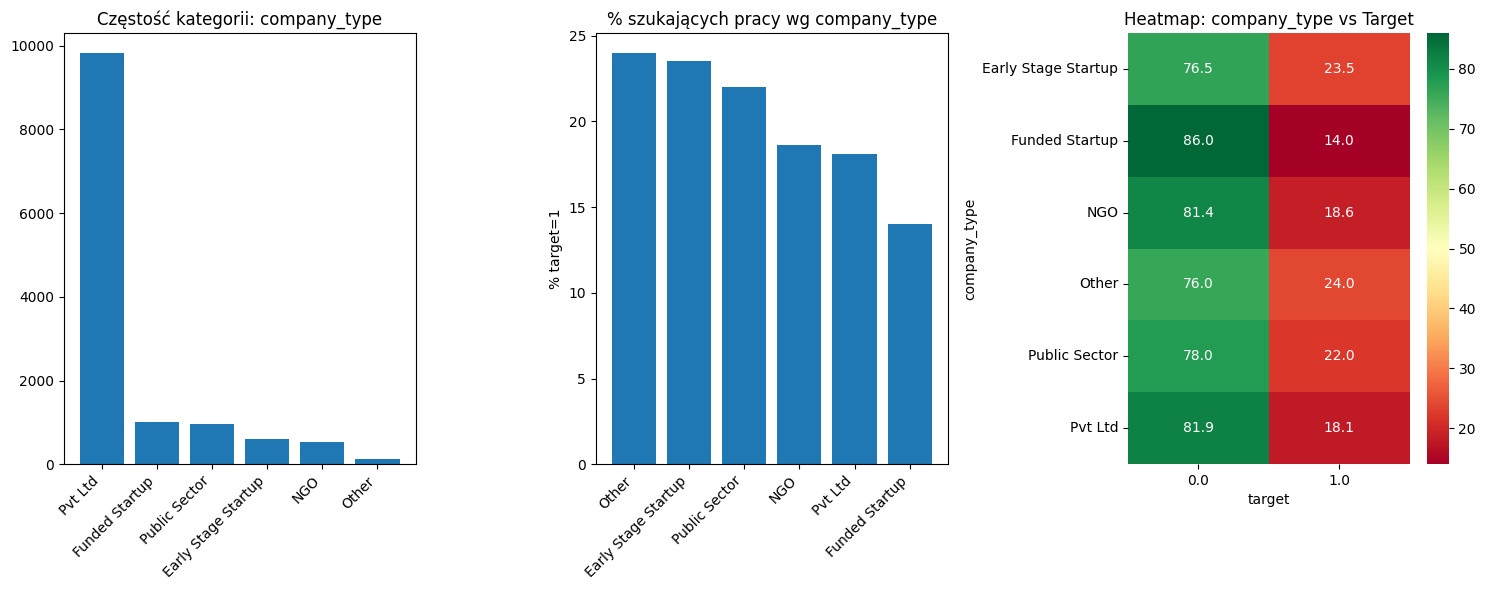


== Analiza company_type ==
Liczba unikalnych wartości: 6
Procent braków: 32.05%

Top 5 kategorii z najwyższym % target=1:
                         mean  count
company_type                        
Other                0.239669    121
Early Stage Startup  0.235489    603
Public Sector        0.219895    955
NGO                  0.186180    521
Pvt Ltd              0.180809   9817


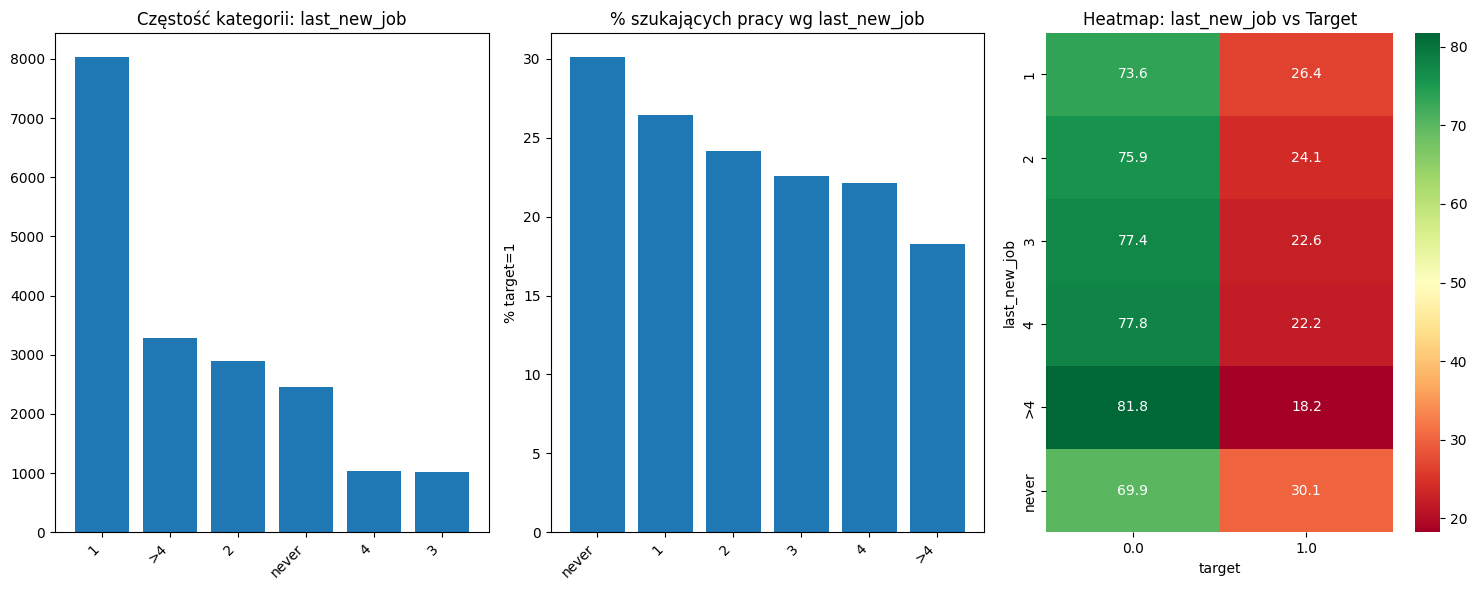


== Analiza last_new_job ==
Liczba unikalnych wartości: 6
Procent braków: 2.21%

Top 5 kategorii z najwyższym % target=1:
                  mean  count
last_new_job                 
never         0.301387   2452
1             0.264303   8040
2             0.241379   2900
3             0.225586   1024
4             0.221574   1029


In [38]:
# 1. analiza zmiennych kategorycznych
# funkcja pomocnicza do analizy zmiennych kategorycznych

def analyze_categorical_vs_target(df, column_name, figsize=(15, 6)):
    """" Analiza zmiennej kategorycznej względem target """

    # grupowanie
    grouped = df.groupby(column_name)['target'].agg(['mean', 'count'])
    missing_grouped = df[df[column_name].isna()].groupby(column_name)['target'].agg(['mean', 'count'])

    fig, axes = plt.subplots(1, 3, figsize=figsize)

    # wykres 1: częstość kategorii
    value_counts = df[column_name].value_counts()
    axes[0].bar(range(len(value_counts)), value_counts.values)
    axes[0].set_title(f'Częstość kategorii: {column_name}')
    axes[0].set_xticks(range(len(value_counts)))
    axes[0].set_xticklabels(value_counts.index, rotation=45, ha='right')

    # wykres 2: procent target=1 dla każdej obserwacji
    grouped_sorted = grouped.sort_values('mean', ascending=False)
    axes[1].bar(range(len(grouped_sorted)), grouped_sorted['mean'] * 100)
    axes[1].set_title(f'% szukających pracy wg {column_name}')
    axes[1].set_xticks(range(len(grouped_sorted)))
    axes[1].set_xticklabels(grouped_sorted.index, rotation=45, ha='right')
    axes[1].set_ylabel('% target=1')

    # wykres 3: heatmap
    pivot = pd.crosstab(df[column_name], df['target'], normalize='index') * 100
    sns.heatmap(pivot, annot=True, fmt='.1f', cmap='RdYlGn', ax=axes[2])
    axes[2].set_title(f'Heatmap: {column_name} vs Target')

    plt.tight_layout()
    plt.show()

    # statystyki
    print(f"\n== Analiza {column_name} ==")
    print(f"Liczba unikalnych wartości: {df[column_name].nunique()}")
    print(f"Procent braków: {df[column_name].isna().mean()*100:.2f}%")
    print(f"\nTop 5 kategorii z najwyższym % target=1:")
    print(grouped.sort_values('mean', ascending=False).head())

    return grouped

# analiza wszystkich zmiennych kategorycznych
categorical_columns = ['city', 'gender', 'relevent_experience', 'enrolled_university', 
                      'education_level', 'major_discipline', 'experience', 
                      'company_size', 'company_type', 'last_new_job']

for col in categorical_columns:
    if col in df_training.columns:
        analyze_categorical_vs_target(df_training, col)

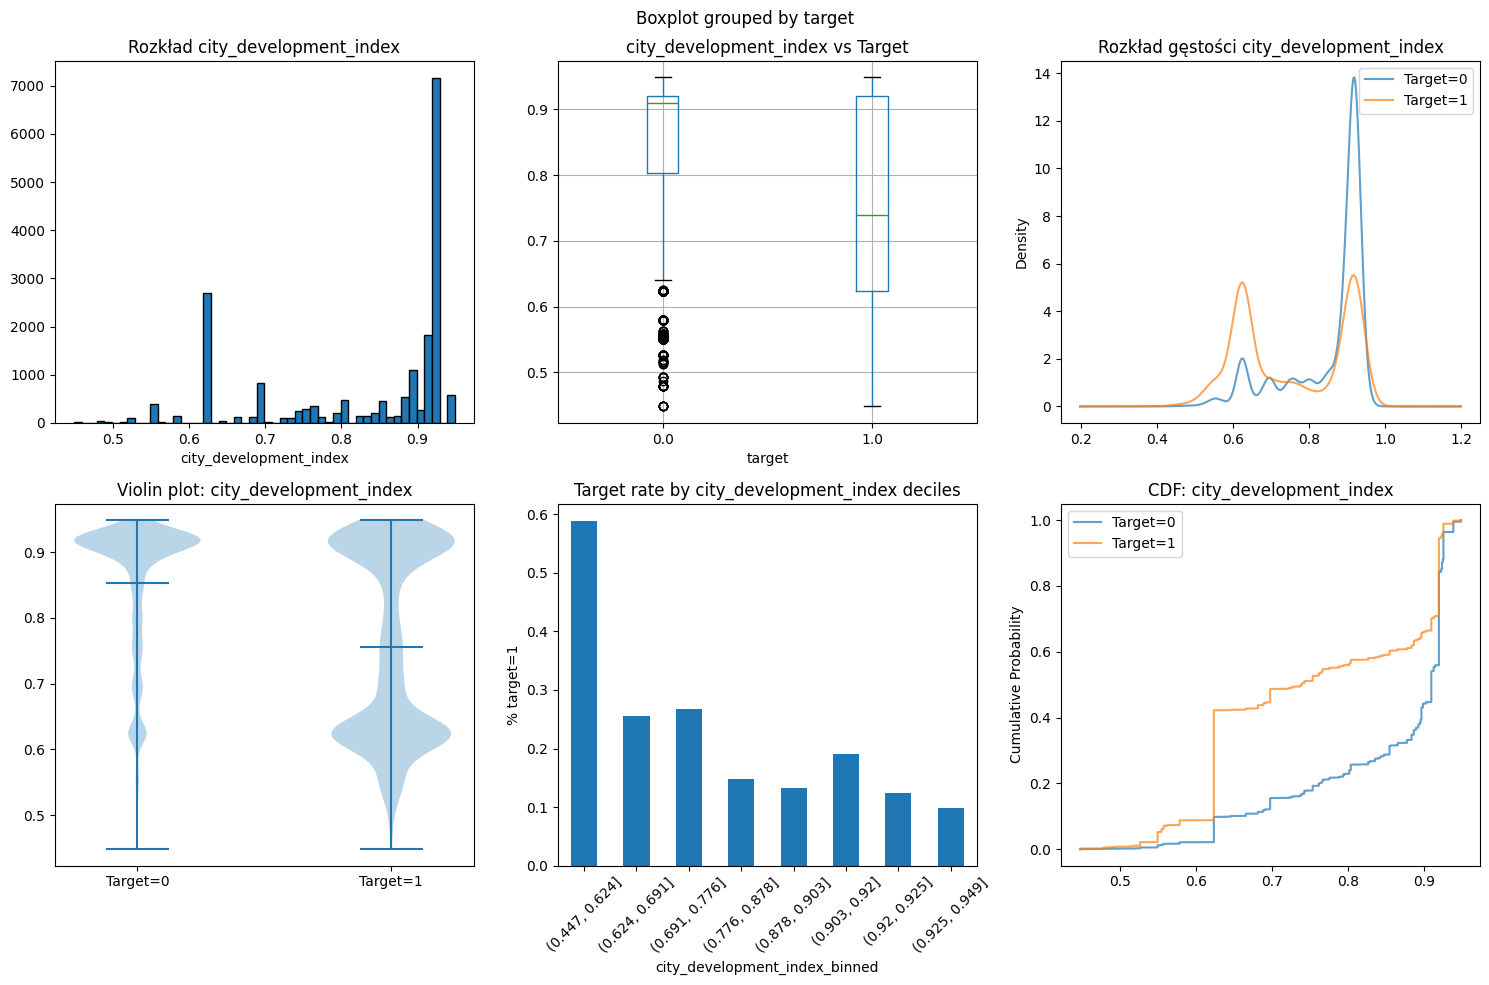


== Statystyki city_development_index ==
          count      mean       std    min    25%   50%   75%    max
target                                                              
0.0     14381.0  0.853139  0.105354  0.448  0.804  0.91  0.92  0.949
1.0      4777.0  0.755719  0.143166  0.448  0.624  0.74  0.92  0.949

T-test: t-statistic=50.3162, p-value=0.0000


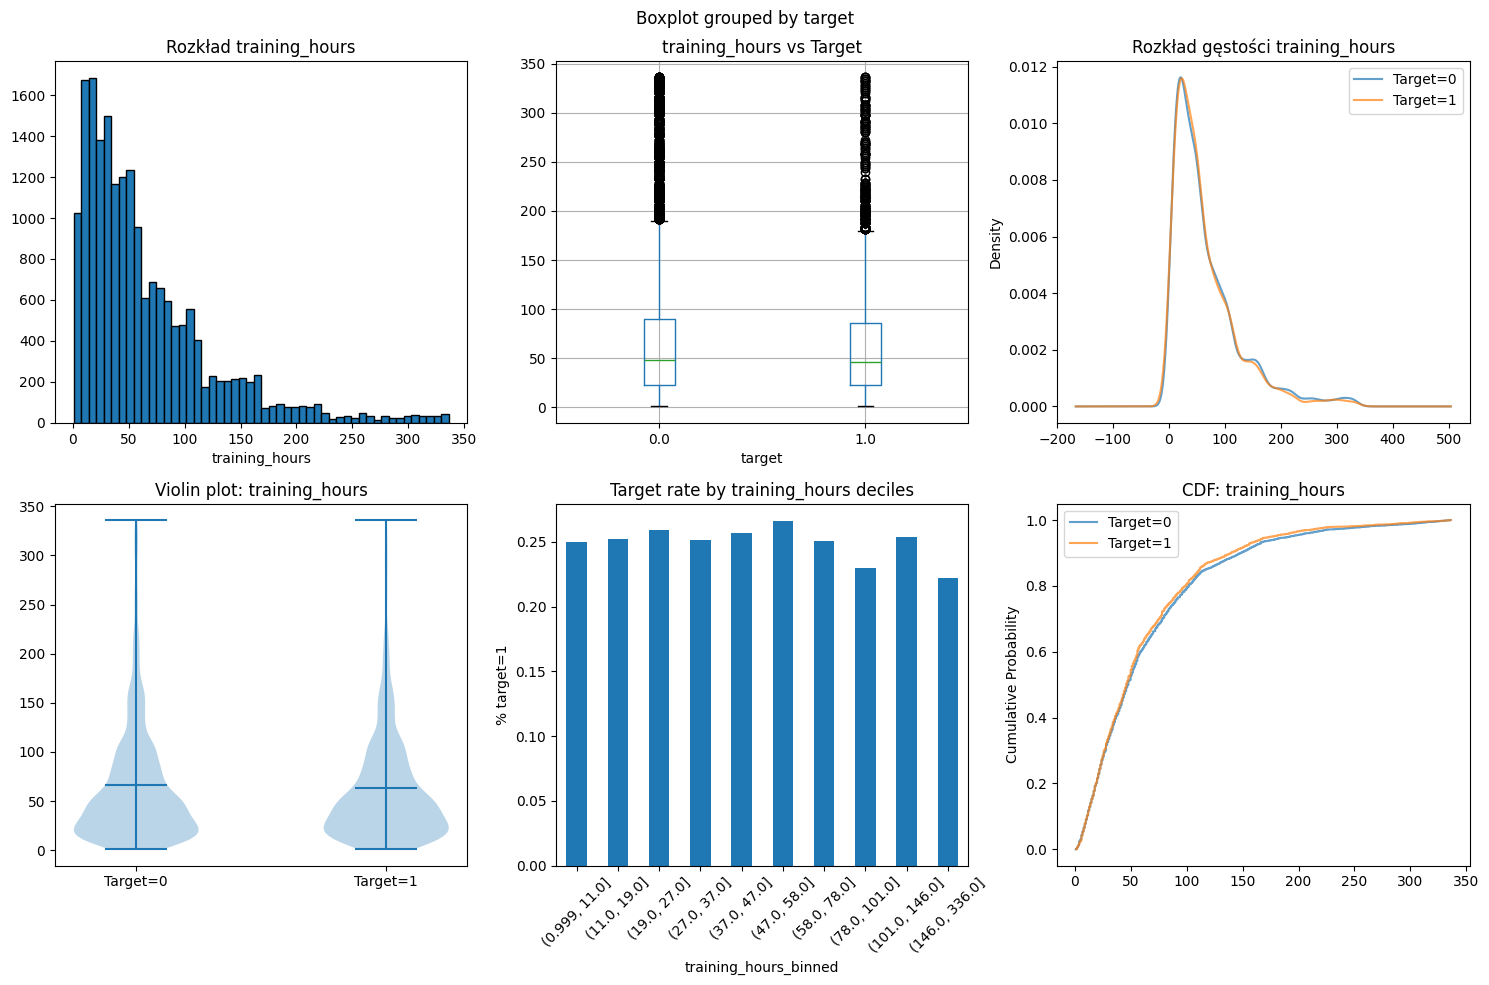


== Statystyki training_hours ==
          count       mean        std  min   25%   50%   75%    max
target                                                             
0.0     14381.0  66.113761  60.938937  1.0  23.0  48.0  90.0  336.0
1.0      4777.0  63.118484  57.273662  1.0  23.0  46.0  86.0  336.0

T-test: t-statistic=2.9871, p-value=0.0028


In [39]:
# 2. analiza zmiennych numerycznych
# analiza city_development_index i training_hours

def analyze_numerical_vs_target(df, column_name):
    """ Analiza zmiennej numerycznej względem target """

    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # histogram ogólny
    axes[0,0].hist(df[column_name].dropna(), bins=50, edgecolor='black')
    axes[0,0].set_title(f'Rozkład {column_name}')
    axes[0,0].set_xlabel(column_name)

    # boxplot względem target
    df.boxplot(column=column_name, by='target', ax=axes[0,1])
    axes[0,1].set_title(f'{column_name} vs Target')

    # density plot
    for target_val in [0, 1]:
        subset = df[df['target'] == target_val][column_name].dropna()
        subset.plot.density(ax=axes[0,2], label=f'Target={target_val}', alpha=0.7)
    axes[0,2].legend()
    axes[0,2].set_title(f'Rozkład gęstości {column_name}')

    # violin plot
    parts = axes[1,0].violinplot([df[df['target']==0][column_name].dropna(),
                                  df[df['target']==1][column_name].dropna()],
                                  positions=[0, 1], showmeans=True)
    axes[1,0].set_xticks([0, 1])
    axes[1,0].set_xticklabels(['Target=0', 'Target=1'])
    axes[1,0].set_title(f'Violin plot: {column_name}')

    # binned analysis
    df_temp = df.copy()
    df_temp[f'{column_name}_binned'] = pd.qcut(df_temp[column_name].dropna(),
                                               q=10, duplicates='drop')
    binned_stats = df_temp.groupby(f'{column_name}_binned')['target'].agg(['mean', 'count'])
    binned_stats['mean'].plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title(f'Target rate by {column_name} deciles')
    axes[1,1].set_ylabel('% target=1')
    axes[1,1].tick_params(axis='x', rotation=45)

    # cumulative distribution
    for target_val in [0, 1]:
        subset = df[df['target'] == target_val][column_name].dropna().sort_values()
        axes[1,2].plot(subset, np.linspace(0, 1, len(subset)),
                       label=f'Target={target_val}', alpha=0.7)
    axes[1,2].legend()
    axes[1,2].set_title(f'CDF: {column_name}')
    axes[1,2].set_ylabel('Cumulative Probability')

    plt.tight_layout()
    plt.show()

    # statystyki
    print(f'\n== Statystyki {column_name} ==')
    print(df.groupby('target')[column_name].describe())

    # test statystyczny
    target_0 = df[df['target']==0][column_name].dropna()
    target_1 = df[df['target']==1][column_name].dropna()
    t_stat, p_value = sp.stats.ttest_ind(target_0, target_1)
    print(f"\nT-test: t-statistic={t_stat:.4f}, p-value={p_value:.4f}")

# analizuj zmienne numeryczne
analyze_numerical_vs_target(df_training, 'city_development_index')
analyze_numerical_vs_target(df_training, 'training_hours')

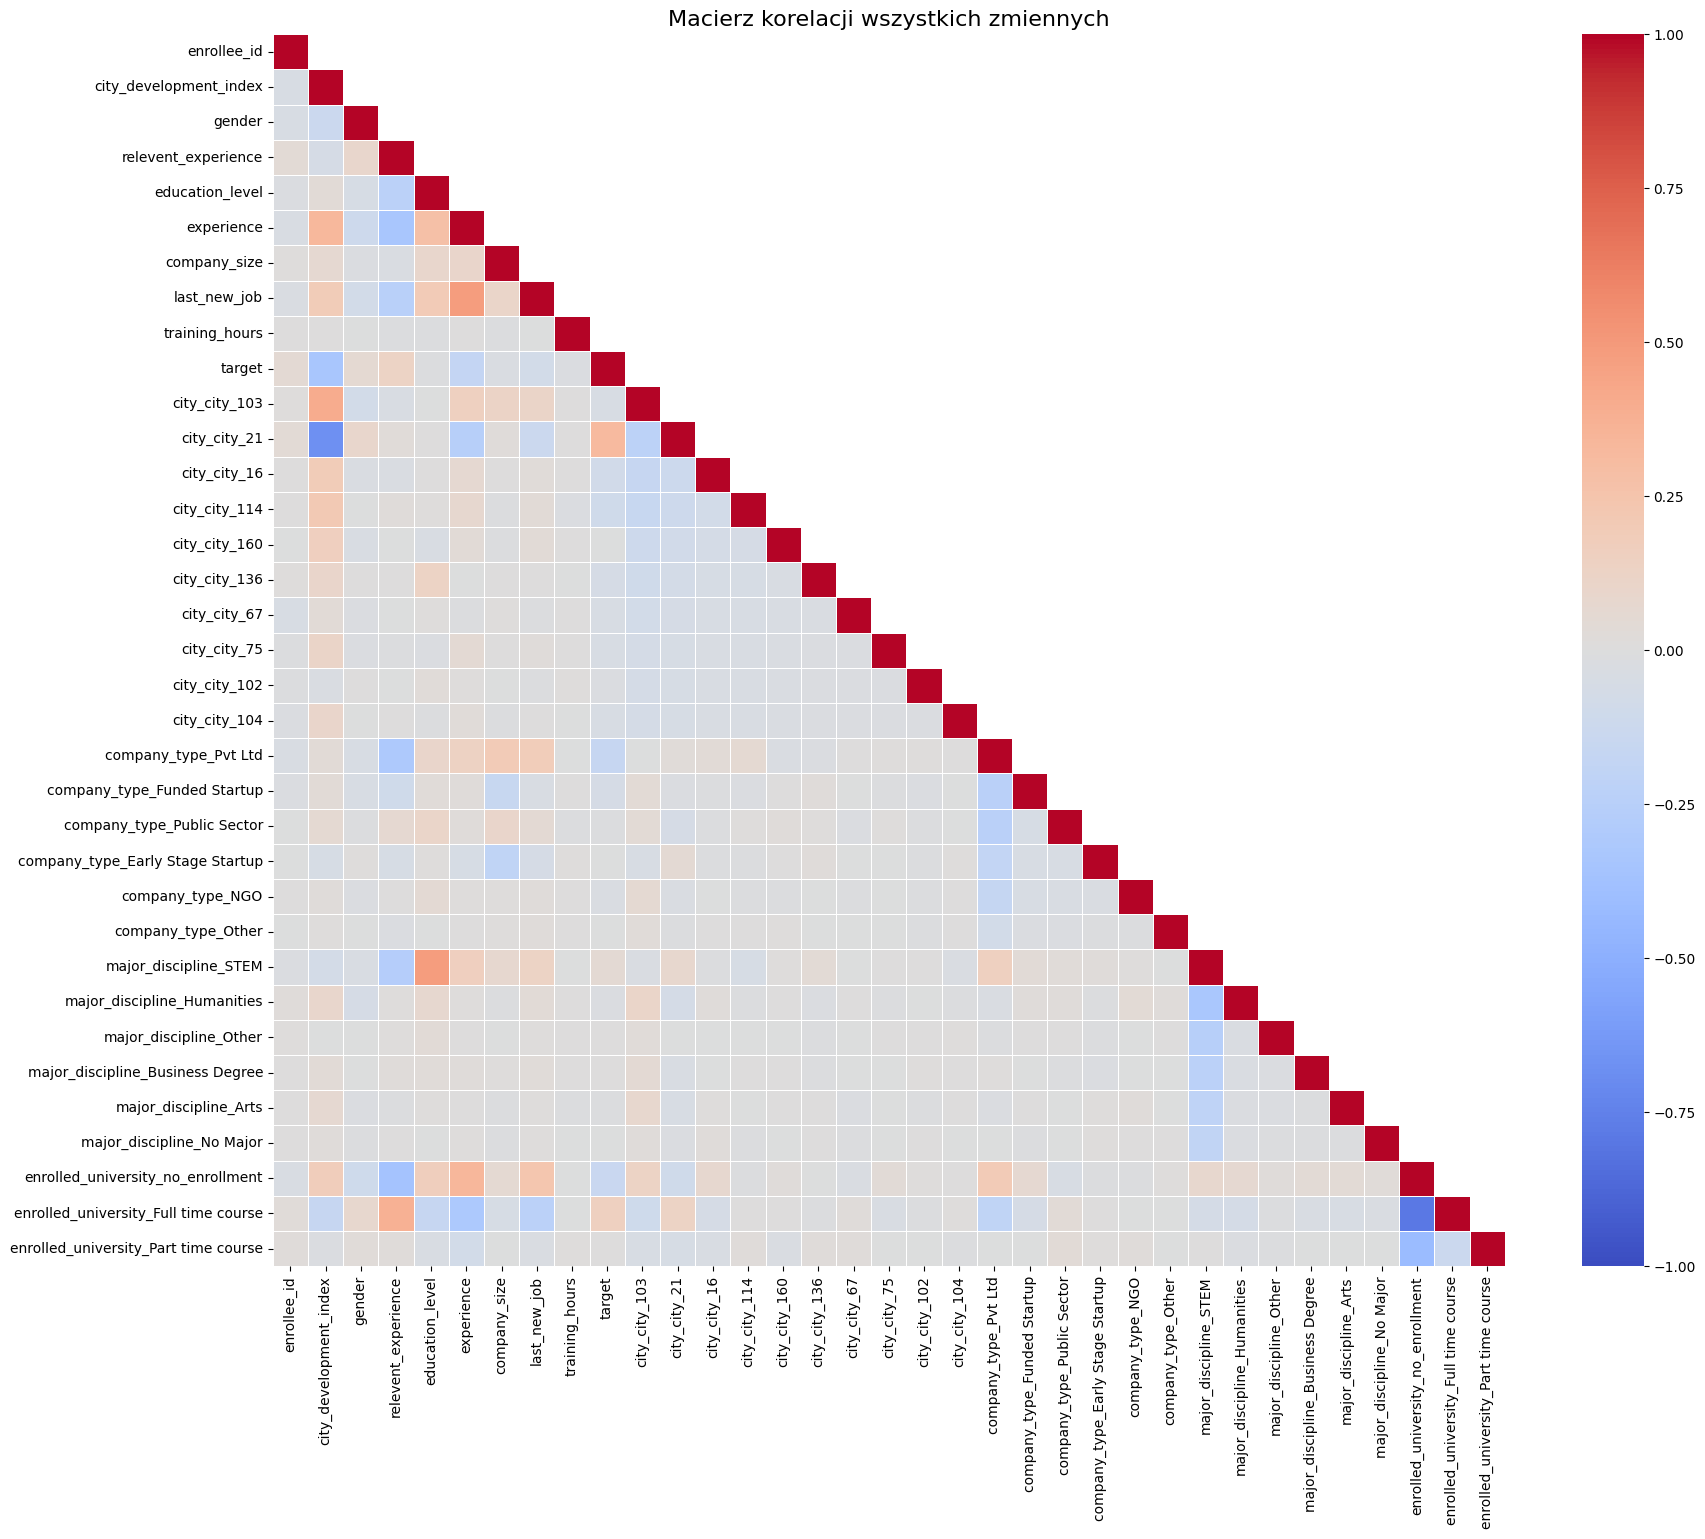


== Top 15 korelacji z Target==
target                                  1.000000
city_city_21                            0.320036
enrolled_university_Full time course    0.150171
relevent_experience                     0.128430
gender                                  0.055275
major_discipline_STEM                   0.049881
enrollee_id                             0.049475
major_discipline_Other                  0.006048
major_discipline_Business Degree        0.004157
enrolled_university_Part time course    0.001635
major_discipline_No Major              -0.000680
company_type_Other                     -0.001783
company_type_Early Stage Startup       -0.005775
city_city_160                          -0.006874
major_discipline_Arts                  -0.010659
Name: target, dtype: float64

== Wysokie korelacje między zmiennymi (>0.5) ==
                                var1                                  var2  \
0             city_development_index                          city_city_21   

In [40]:
# 3. macierz korelacji
# przygotowanie danych do korelacji

from sklearn.preprocessing import LabelEncoder

def prepare_data_for_correlation(df):
    """ Kodowanie zmiennych kategorycznych dla analizy korelacji """
    df_encoded = df.copy()

    # label encoding dla zmiennych binarnych
    binary_columns = ['gender', 'relevent_experience']
    for col in binary_columns:
        if col in df_encoded.columns:
            le = LabelEncoder()
            df_encoded[col] = df_encoded[col].fillna('Missing')
            df_encoded[col] = le.fit_transform(df_encoded[col])

    # ordinal encoding dla zmiennych uporządkowanych
    ordinal_mappings = {
        'education_level': {'Primary School': 1, 'High School': 2, 'Graduate': 3, 
                           'Masters': 4, 'Phd': 5},
        'company_size': {'<10': 1, '10-49': 2, '50-99': 3, '100-500': 4, 
                        '500-999': 5, '1000-4999': 6, '5000-9999': 7, '10000+': 8},
        'experience': {'<1': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, 
                      '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, 
                      '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, 
                      '18': 18, '19': 19, '20': 20, '>20': 21},
        'last_new_job': {'never': 0, '1': 1, '2': 2, '3': 3, '4': 4, '>4': 5}
    }

    for col, mapping in ordinal_mappings.items():
        if col in df_encoded.columns:
            df_encoded[col] = df_encoded[col].map(mapping)

    # one-hot encoding dla pozostałych kategorycznych (z ograniczeniem)
    high_cardinality = ['city', 'company_type', 'major_discipline', 'enrolled_university']
    for col in high_cardinality:
        if col in df_encoded.columns:
            # zakoduj tylko top 10 najczęstszych kategorii
            top_categories = df_encoded[col].value_counts().head(10).index
            for category in top_categories:
                df_encoded[f'{col}_{category}'] = (df_encoded[col] == category).astype(int)
            df_encoded.drop(col, axis=1, inplace=True)

    # usuń kolumny z dużą ilością braków
    missing_threshold = 0.7
    cols_to_drop = df_encoded.columns[df_encoded.isnull().mean() > missing_threshold]
    df_encoded.drop(cols_to_drop, axis=1, inplace=True)

    # wypełnij pozostałe braki
    df_encoded.fillna(df_encoded.median(), inplace=True)

    return df_encoded

# przygotuj dane i oblicz korelacje
df_encoded = prepare_data_for_correlation(df_training)

# macierz korelacji
plt.figure(figsize=(20,16))
correlation_matrix = df_encoded.corr()

# heatmapa
mask = np.triu(np.ones_like(correlation_matrix), k=1)
sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm',
            center=0, vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title('Macierz korelacji wszystkich zmiennych', fontsize=16)
plt.show()

# top korelacje z target
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print("\n== Top 15 korelacji z Target==")
print(target_corr.head(15))

# znajdź silne korelacje między zmiennymi (oprócz target)
def find_high_correlations(corr_matrix, threshold=0.5):
    """ Znajdź pary zmiennych z wysoką korelacją """
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                if corr_matrix.columns[i] != 'target' and corr_matrix.columns[j] != 'target':
                    high_corr.append({
                        'var1': corr_matrix.columns[i],
                        'var2': corr_matrix.columns[j],
                        'corr': corr_matrix.iloc[i, j]
                    })
    return pd.DataFrame(high_corr).sort_values('corr', ascending=False)

high_correlations = find_high_correlations(correlation_matrix, threshold=0.5)
print("\n== Wysokie korelacje między zmiennymi (>0.5) ==")
print(high_correlations)

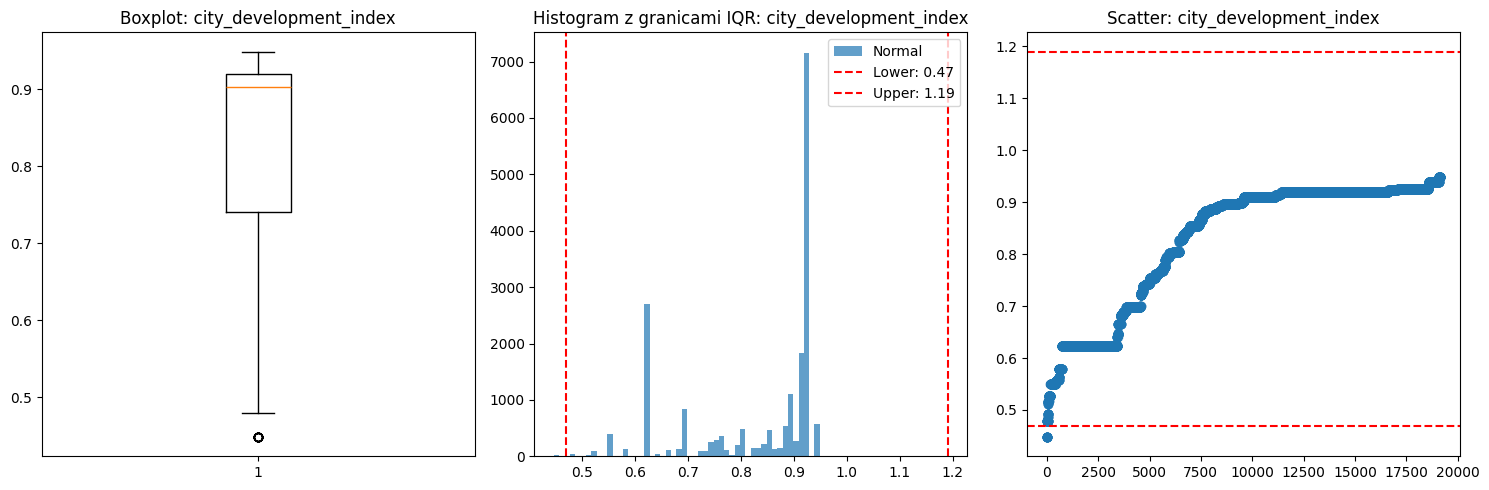

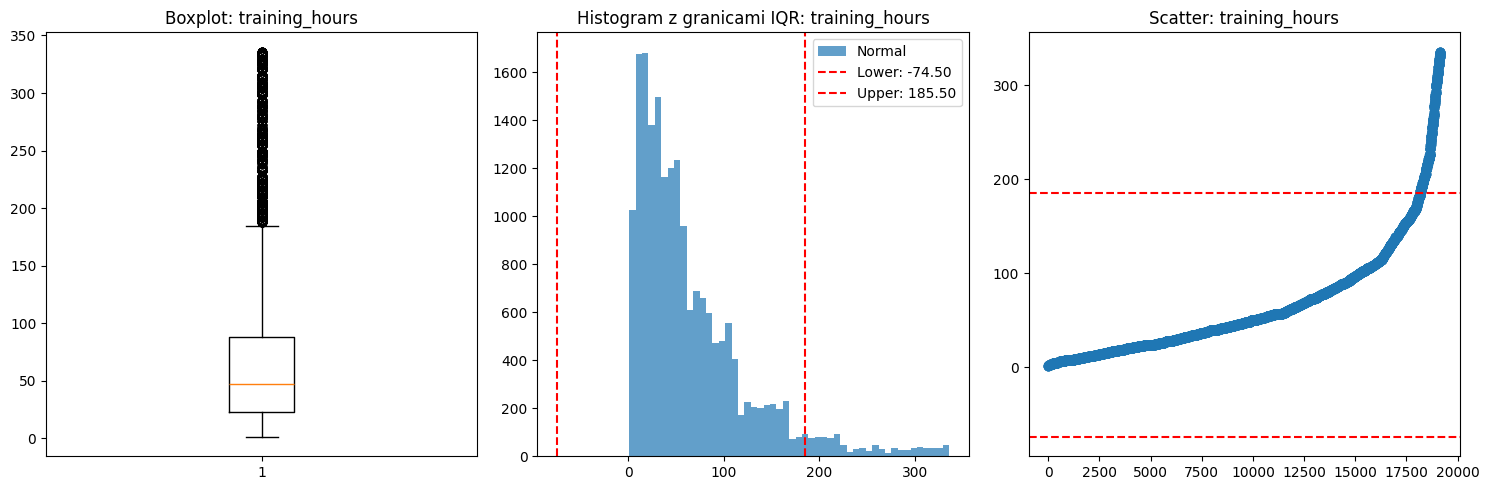


== Podsumowanie outlierów ==
                        IQR_method  Z-score_method  Isolation_Fores  \
city_development_index        17.0            17.0           1857.0   
training_hours               984.0           450.0           1890.0   

                        Lower_bound_IQR  Upper_bound_IQR  
city_development_index             0.47             1.19  
training_hours                   -74.50           185.50  

city_development_index - Outliers vs Target:
Target rate w outlierach: 64.71%
Target rate w normalnych: 24.90%

training_hours - Outliers vs Target:
Target rate w outlierach: 21.34%
Target rate w normalnych: 25.13%


In [41]:
# 4. detekcja outlierów

from scipy import stats

def detect_outliers(df, numerical_columns):
    """ Wykryj outliery używając różnych metod """

    outlier_summary = {}

    for col in numerical_columns:
        if col in df.columns:
            data = df[col].dropna()

            # metoda IQR
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers_iqr = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

            # metoda Z-score
            z_scores = np.abs(stats.zscore(data))
            outliers_zscore = df[col][z_scores > 3]

            # Isolation Fores
            from sklearn.ensemble import IsolationForest
            iso_forest = IsolationForest(contamination=0.1, random_state=42)
            outlier_pred = iso_forest.fit_predict(data.values.reshape(-1, 1))
            outliers_iso = sum(outlier_pred == -1)

            outlier_summary[col] = {
                'IQR_method': len(outliers_iqr),
                'Z-score_method': len(outliers_zscore),
                'Isolation_Fores': outliers_iso,
                'Lower_bound_IQR': lower_bound,
                'Upper_bound_IQR': upper_bound
            }

            # wizualizacja
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))

            # boxplot
            axes[0].boxplot(data)
            axes[0].set_title(f'Boxplot: {col}')

            # histogram z outlierami
            axes[1].hist(data, bins=50, alpha=0.7, label='Normal')
            axes[1].axvline(lower_bound, color='r', linestyle='--', label=f'Lower: {lower_bound:.2f}')
            axes[1].axvline(upper_bound, color='r', linestyle='--', label=f'Upper: {upper_bound:.2f}')
            axes[1].set_title(f'Histogram z granicami IQR: {col}')
            axes[1].legend()

            # scatter plot outlierów
            axes[2].scatter(range(len(data)), sorted(data), alpha=0.5)
            axes[2].axhline(lower_bound, color='r', linestyle='--')
            axes[2].axhline(upper_bound, color='r', linestyle='--')
            axes[2].set_title(f'Scatter: {col}')

            plt.tight_layout()
            plt.show()

    return pd.DataFrame(outlier_summary).T

# wykryj outliery
numerical_cols = ['city_development_index', 'training_hours']
outliers_df = detect_outliers(df_training, numerical_cols)
print("\n== Podsumowanie outlierów ==")
print(outliers_df)

# analiza outlierów względem target
for col in numerical_cols:
    if col in df_training.columns:
        Q1 = df_training[col].quantile(0.25)
        Q3 = df_training[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df_training[(df_training[col] < Q1 - 1.5 * IQR) |
                               (df_training[col] > Q3 + 1.5 * IQR)]

        if len(outliers) > 0:
            print(f"\n{col} - Outliers vs Target:")
            print(f"Target rate w outlierach: {outliers['target'].mean():.2%}")
            print(f"Target rate w normalnych: {df_training[~df_training.index.isin(outliers.index)]['target'].mean():.2%}")

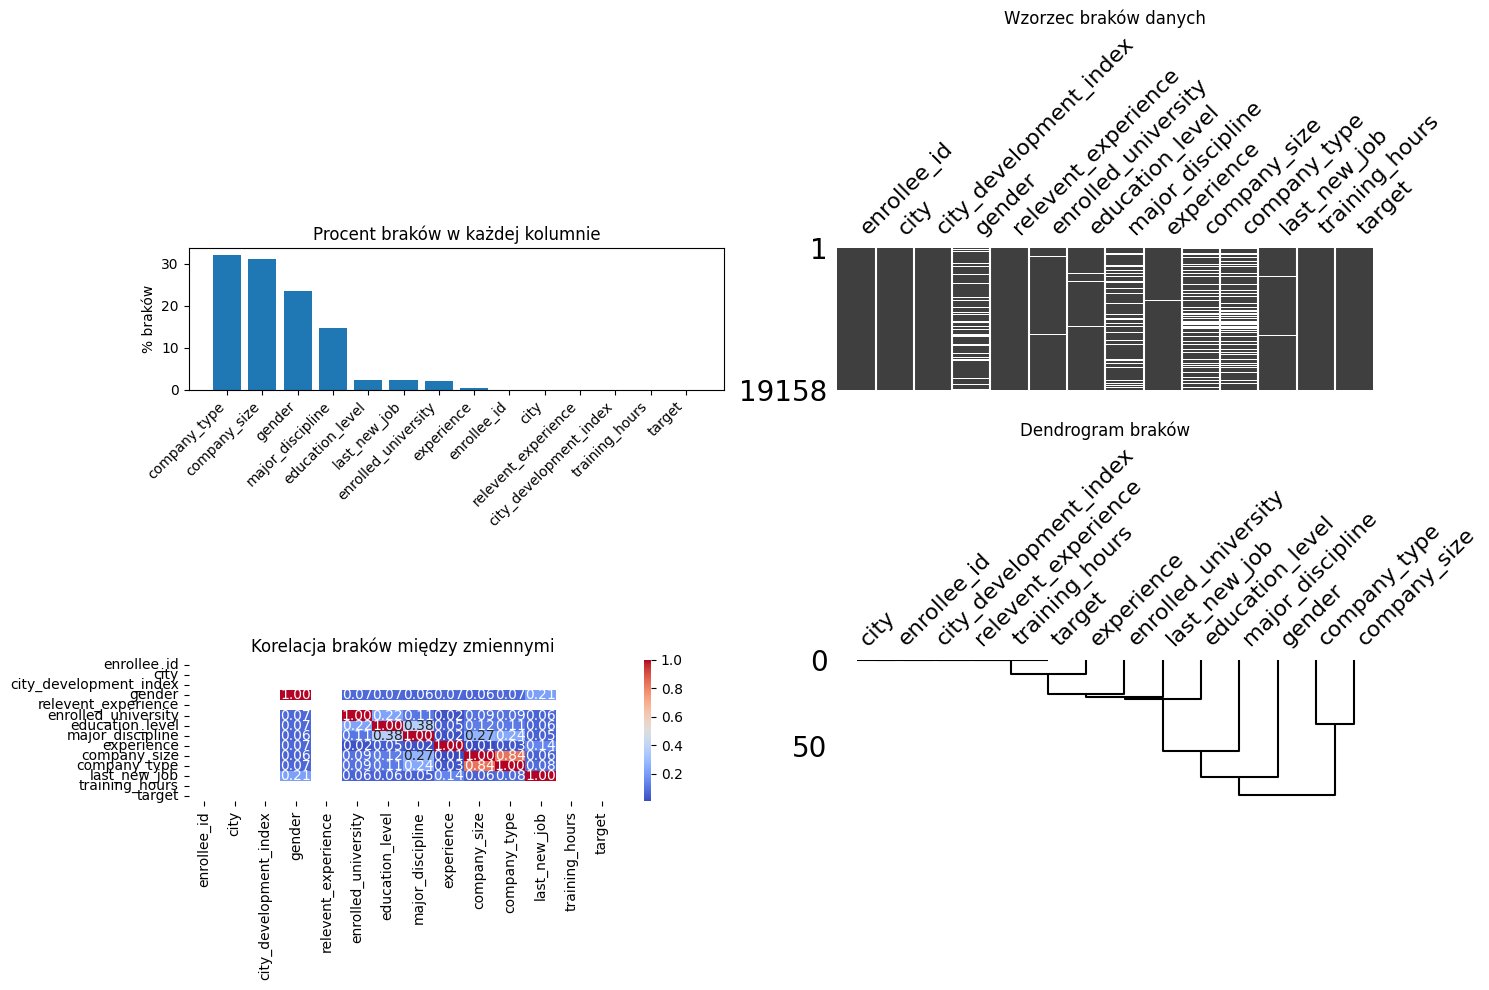


== Wpływ braków na target ==
gender               | Z brakami: 30.81% | Bez braków: 23.13% | Różnica: 7.69%
enrolled_university  | Z brakami: 31.87% | Bez braków: 24.79% | Różnica: 7.07%
education_level      | Z brakami: 22.61% | Bez braków: 24.99% | Różnica: 2.38%
major_discipline     | Z brakami: 19.52% | Bez braków: 25.87% | Różnica: 6.35%
experience           | Z brakami: 35.38% | Bez braków: 24.90% | Różnica: 10.49%
company_size         | Z brakami: 40.59% | Bez braków: 17.90% | Różnica: 22.68%
company_type         | Z brakami: 38.83% | Bez braków: 18.38% | Różnica: 20.45%
last_new_job         | Z brakami: 36.41% | Bez braków: 24.68% | Różnica: 11.73%

== Podsumowanie braków danych ==
                                        Column  Missing_Count  Missing_Percent
company_type                      company_type           6140        32.049274
company_size                      company_size           5938        30.994885
gender                                  gender           4508  

In [42]:
# 5. analiza braków danych (szczegółowa)

def analyze_missing_patterns(df):
    """ Szczegółowa analiza wzorców braków danych """

    # macierz braków
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': df.isnull().sum(),
        'Missing_Percent': df.isnull().mean() * 100
    }).sort_values('Missing_Percent', ascending=False)

    # wizualizacja braków
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # wykres słupkowy
    axes[0,0].bar(range(len(missing_df)), missing_df['Missing_Percent'])
    axes[0,0].set_xticks(range(len(missing_df)))
    axes[0,0].set_xticklabels(missing_df['Column'], rotation=45, ha='right')
    axes[0,0].set_title('Procent braków w każdej kolumnie')
    axes[0,0].set_ylabel('% braków')

    # heatmapa braków
    msno.matrix(df, ax=axes[0,1])
    axes[0,1].set_title('Wzorzec braków danych')

    # korelacja braków
    missing_corr = df.isnull().corr()
    sns.heatmap(missing_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1,0])
    axes[1,0].set_title('Korelacja braków między zmiennymi')

    # dendrogram braków
    msno.dendrogram(df, ax=axes[1,1])
    axes[1,1].set_title('Dendrogram braków')

    plt.tight_layout()
    plt.show()

    # analiza braków względem target
    print("\n== Wpływ braków na target ==")
    for col in df.columns:
        if df[col].isnull().any() and col != 'target':
            with_missing = df[df[col].isnull()]['target'].mean()
            without_missing = df[df[col].notnull()]['target'].mean()
            print(f"{col:20} | Z brakami: {with_missing:.2%} | Bez braków: {without_missing:.2%} | Różnica: {abs(with_missing-without_missing):.2%}")

    return missing_df

import missingno as msno

missing_analysis = analyze_missing_patterns(df_training)
print("\n== Podsumowanie braków danych ==")
print(missing_analysis)

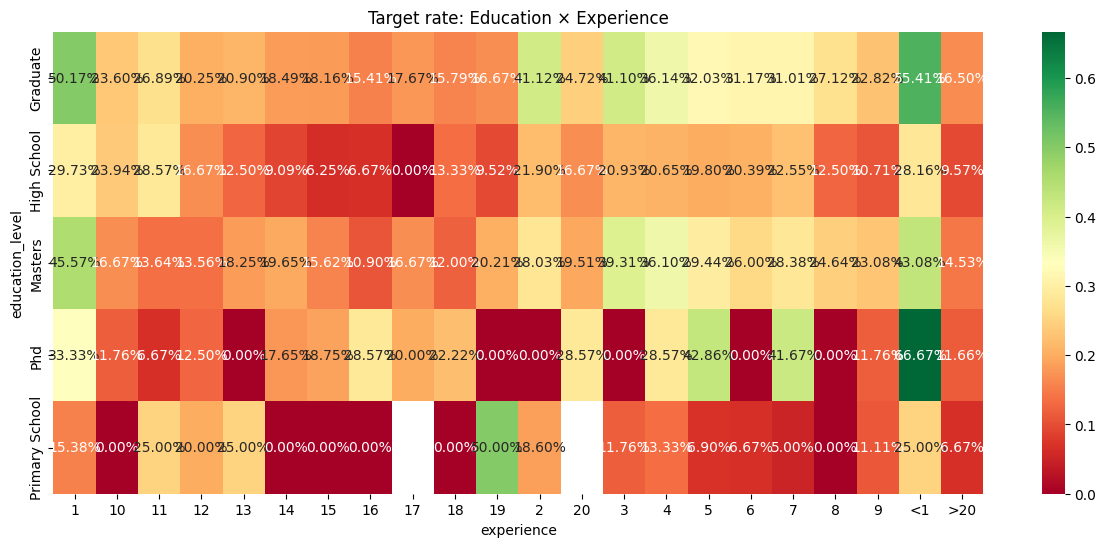

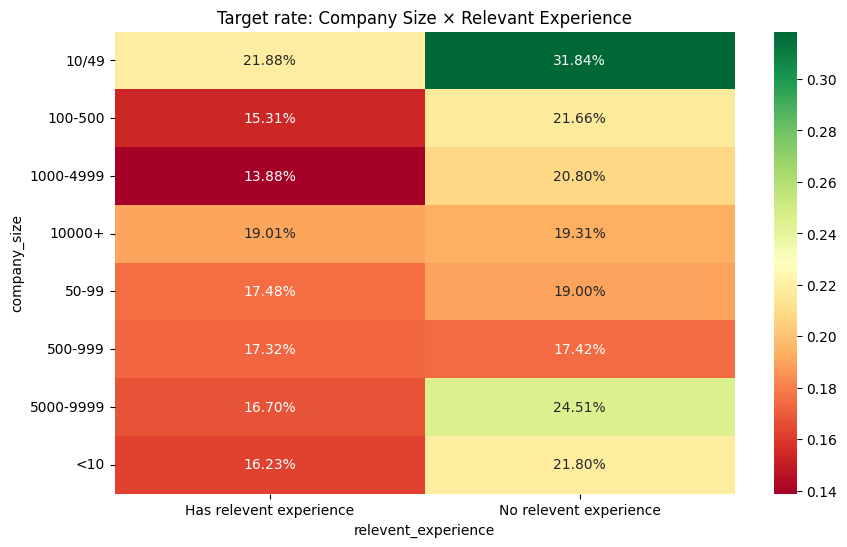

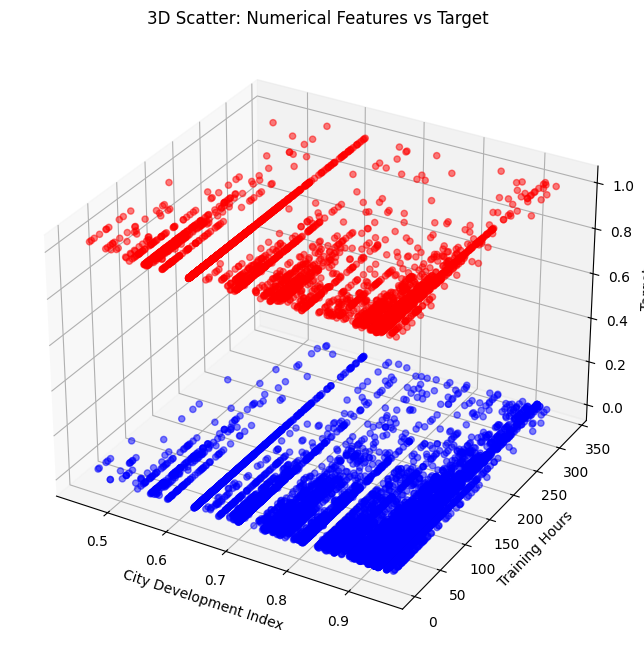

In [43]:
# 6. Analiza wielowymiarowa i interakcje

# Analiza interakcji między zmiennymi
def analyze_interactions(df):
    """ Analiza interakcji między kluczowymi zmiennymi """
    
    # Interakcja: experience × education_level
    pivot1 = pd.pivot_table(df, values='target', 
                            index='education_level', 
                            columns='experience', 
                            aggfunc='mean')
    
    plt.figure(figsize=(15, 6))
    sns.heatmap(pivot1, annot=True, fmt='.2%', cmap='RdYlGn')
    plt.title('Target rate: Education × Experience')
    plt.show()
    
    # Interakcja: company_size × relevent_experience
    pivot2 = pd.pivot_table(df, values='target',
                            index='company_size',
                            columns='relevent_experience',
                            aggfunc='mean')
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot2, annot=True, fmt='.2%', cmap='RdYlGn')
    plt.title('Target rate: Company Size × Relevant Experience')
    plt.show()
    
    # 3D scatter dla zmiennych numerycznych
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    colors = ['blue' if t == 0 else 'red' for t in df['target']]
    ax.scatter(df['city_development_index'], 
              df['training_hours'],
              df['target'],
              c=colors, alpha=0.5)
    
    ax.set_xlabel('City Development Index')
    ax.set_ylabel('Training Hours')
    ax.set_zlabel('Target')
    ax.set_title('3D Scatter: Numerical Features vs Target')
    plt.show()

analyze_interactions(df_training)

In [44]:
# 7. Podsumowanie kluczowych wniosków

def create_eda_summary(df):
    """Stwórz podsumowanie najważniejszych wniosków z EDA"""
    
    summary = {
        'Dataset Shape': df.shape,
        'Target Distribution': df['target'].value_counts(normalize=True).to_dict(),
        'Missing Data': df.isnull().sum().sum(),
        'Numerical Features': df.select_dtypes(include=[np.number]).columns.tolist(),
        'Categorical Features': df.select_dtypes(include=['object']).columns.tolist(),
        'High Cardinality Features': [col for col in df.columns if df[col].nunique() > 50]
    }
    
    print("="*50)
    print("PODSUMOWANIE EDA")
    print("="*50)
    for key, value in summary.items():
        print(f"{key}: {value}")
    
    return summary

eda_summary = create_eda_summary(df_training)

PODSUMOWANIE EDA
Dataset Shape: (19158, 14)
Target Distribution: {0.0: 0.7506524689424784, 1.0: 0.24934753105752167}
Missing Data: 20733
Numerical Features: ['enrollee_id', 'city_development_index', 'training_hours', 'target']
Categorical Features: ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
High Cardinality Features: ['enrollee_id', 'city', 'city_development_index', 'training_hours']


TEST CHI-KWADRAT DLA ZMIENNYCH KATEGORYCZNYCH

Wyniki testu chi-kwadrat (czytelne formatowanie):
              Variable     Chi2 P-value_formatted        Interpretation  \
0                 city  2998.78           < 0.001  Bardzo silny związek   
6           experience   701.57           < 0.001  Bardzo silny związek   
3  enrolled_university   455.17           < 0.001  Bardzo silny związek   
2  relevent_experience   315.34           < 0.001  Bardzo silny związek   
4      education_level   165.66           < 0.001  Bardzo silny związek   
9         last_new_job   132.50           < 0.001  Bardzo silny związek   
7         company_size    45.53           < 0.001  Bardzo silny związek   
8         company_type    35.04           < 0.001  Bardzo silny związek   
1               gender     9.04            0.0109   Umiarkowany związek   
5     major_discipline    12.21            0.0321   Umiarkowany związek   

   Significant  
0         True  
6         True  
3         True  
2        

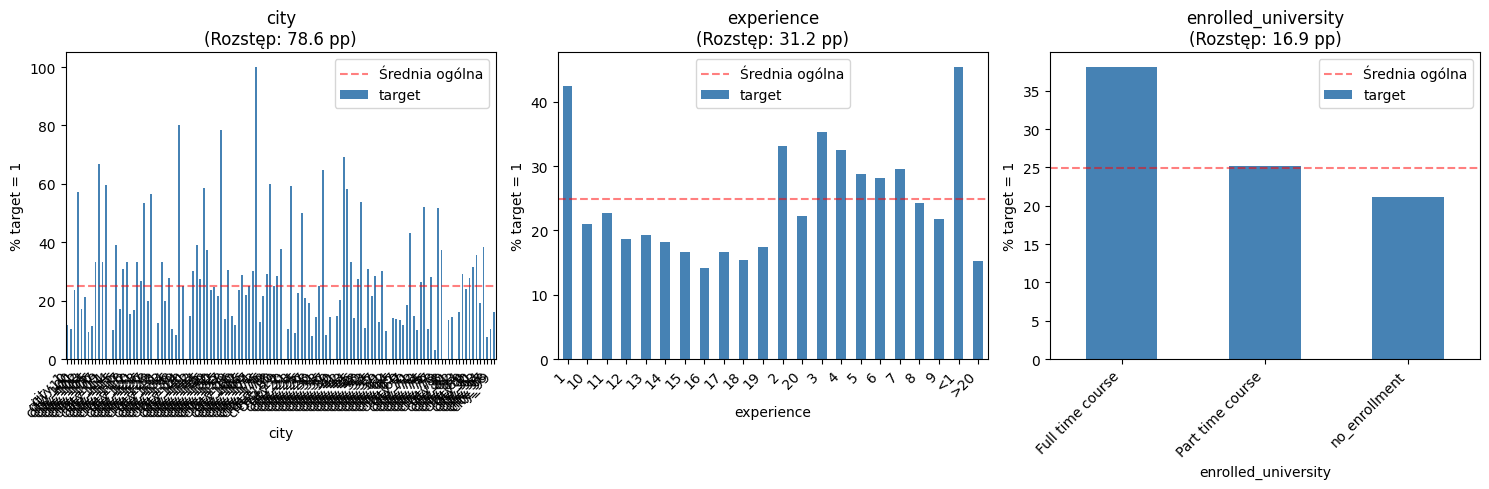


MUTUAL INFORMATION ANALYSIS

Ranking zmiennych według Mutual Information Score:
                   Feature  MI_Score
2   city_development_index  0.068418
1                     city  0.065374
9             company_size  0.031359
10            company_type  0.027773
8               experience  0.019868
0              enrollee_id  0.015207
4      relevent_experience  0.014933
5      enrolled_university  0.011839
3                   gender  0.008385
11            last_new_job  0.006660
6          education_level  0.005002
12          training_hours  0.002549
7         major_discipline  0.000863


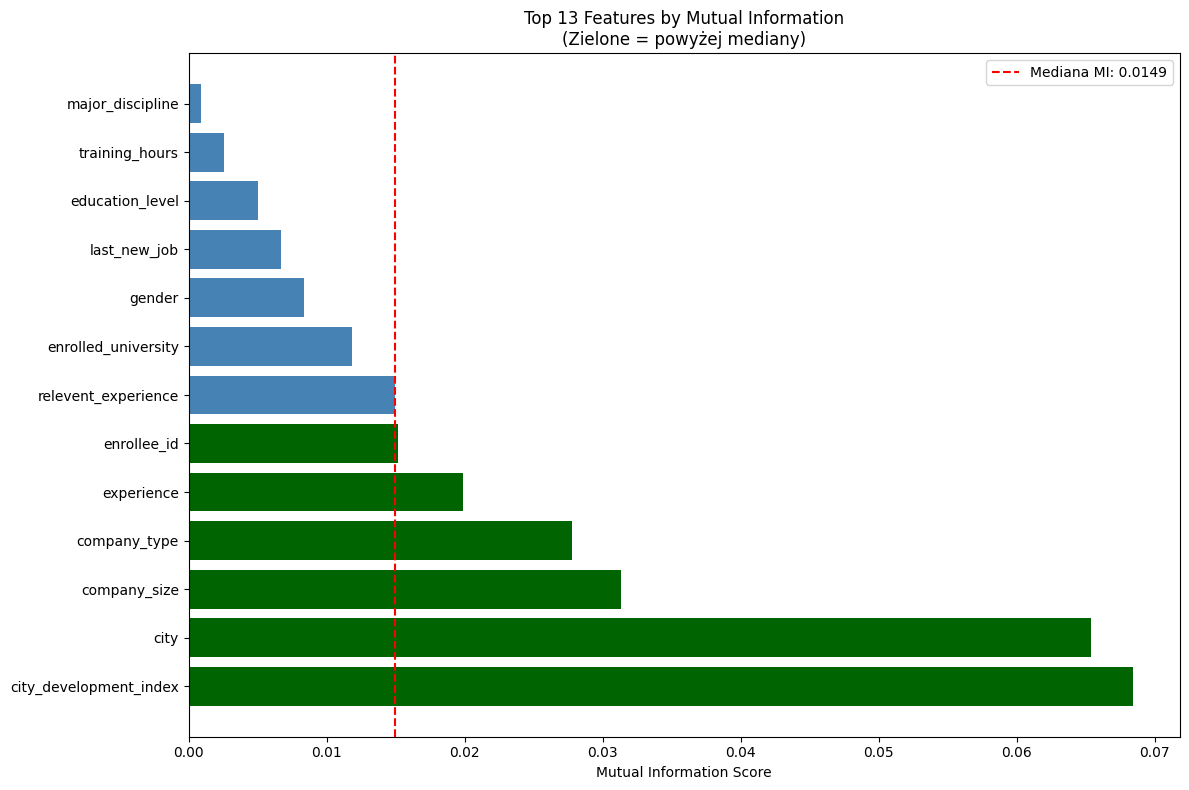


PODSUMOWANIE TESTÓW STATYSTYCZNYCH

🔍 Znaleziono 10 zmiennych istotnych statystycznie (chi-kwadrat):
  • city: p-value = 0.000000
  • experience: p-value = 0.000000
  • enrolled_university: p-value = 0.000000
  • relevent_experience: p-value = 0.000000
  • education_level: p-value = 0.000000

📊 Zmienne z wysokim MI Score (top 25%):
  • city_development_index: MI Score = 0.0684
  • city: MI Score = 0.0654
  • company_size: MI Score = 0.0314

📈 Zmienne z silnymi wzorcami (rozstęp > 10pp):
  • city: rozstęp 78.6pp (min: 0.0% w 'city_39', max: 78.6% w 'city_155')
  • experience: rozstęp 31.2pp (min: 14.2% w '16', max: 45.4% w '<1')
  • enrolled_university: rozstęp 16.9pp (min: 21.1% w 'no_enrollment', max: 38.1% w 'Full time course')
  • education_level: rozstęp 14.7pp (min: 13.3% w 'Primary School', max: 28.0% w 'Graduate')
  • relevent_experience: rozstęp 12.4pp (min: 21.5% w 'Has relevent experience', max: 33.8% w 'No relevent experience')

💡 REKOMENDACJE DO MODELOWANIA (na podstawie a

In [45]:
# Opcjonalne dodatki do EDA

# 1. Test chi-kwadrat dla zmiennych kategorycznych
from scipy.stats import chi2_contingency
import pandas as pd

def chi_square_test(df, categorical_cols, target='target'):
    """Test chi-kwadrat dla zmiennych kategorycznych"""
    chi_results = []
    for col in categorical_cols:
        if col in df.columns and col != target:
            # Usuń NaN dla testu
            df_clean = df[[col, target]].dropna()
            if len(df_clean) > 0 and df_clean[col].nunique() > 1:
                contingency_table = pd.crosstab(df_clean[col], df_clean[target])
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)
                chi_results.append({
                    'Variable': col,
                    'Chi2': chi2,
                    'P-value': p_value,
                    'Significant': p_value < 0.05
                })
    return pd.DataFrame(chi_results).sort_values('P-value')

# WYKONAJ TEST CHI-KWADRAT
print("="*60)
print("TEST CHI-KWADRAT DLA ZMIENNYCH KATEGORYCZNYCH")
print("="*60)

categorical_columns = [col for col in df_training.select_dtypes(include=['object']).columns 
                      if col != 'target']

chi_results = chi_square_test(df_training, categorical_columns)

chi_results_formatted = chi_results.copy()
chi_results_formatted['Chi2'] = chi_results_formatted['Chi2'].apply(lambda x: f"{x:.2f}")
chi_results_formatted['P-value_formatted'] = chi_results_formatted['P-value'].apply(
    lambda x: "< 0.001" if x < 0.001 else f"{x:.4f}"
)
chi_results_formatted['Interpretation'] = chi_results_formatted['P-value'].apply(
    lambda x: "Bardzo silny związek" if x < 0.001 
    else "Silny związek" if x < 0.01 
    else "Umiarkowany związek" if x < 0.05 
    else "Brak związku"
)

print("\nWyniki testu chi-kwadrat (czytelne formatowanie):")
print(chi_results_formatted[['Variable', 'Chi2', 'P-value_formatted', 'Interpretation', 'Significant']])

# 2. Analiza wzorców dla wszystkich zmiennych kategorycznych
def analyze_categorical_patterns(df, target='target'):
    """Znajdź wzorce w zmiennych kategorycznych"""
    print("\n" + "="*60)
    print("ANALIZA WZORCÓW W ZMIENNYCH KATEGORYCZNYCH")
    print("="*60)
    
    pattern_results = {}
    
    for col in df.select_dtypes(include=['object']).columns:
        if col != target and col in df.columns:
            analysis = df.groupby(col)[target].agg(['mean', 'count'])
            analysis = analysis[analysis['count'] >= 10]  # Filtruj małe grupy
            
            if len(analysis) > 1:
                # Oblicz rozstęp (różnica między max a min)
                spread = analysis['mean'].max() - analysis['mean'].min()
                pattern_results[col] = {
                    'spread': spread,
                    'max_rate': analysis['mean'].max(),
                    'min_rate': analysis['mean'].min(),
                    'max_category': analysis['mean'].idxmax(),
                    'min_category': analysis['mean'].idxmin()
                }
    
    # Posortuj według rozstępu (większy rozstęp = silniejszy wzorzec)
    pattern_df = pd.DataFrame(pattern_results).T
    pattern_df = pattern_df.sort_values('spread', ascending=False)
    
    print("\nZmienne z największym rozstępem target rate (silne wzorce):")
    print(pattern_df.head(10))
    
    # Wizualizacja top 3 zmiennych z najsilniejszymi wzorcami
    top_patterns = pattern_df.head(3)
    if len(top_patterns) > 0:
        fig, axes = plt.subplots(1, min(3, len(top_patterns)), figsize=(15, 5))
        if len(top_patterns) == 1:
            axes = [axes]
        
        for idx, (col_name, row) in enumerate(top_patterns.iterrows()):
            group_data = df.groupby(col_name)[target].mean() * 100
            group_data.plot(kind='bar', ax=axes[idx], color='steelblue')
            axes[idx].set_title(f'{col_name}\n(Rozstęp: {row["spread"]*100:.1f} pp)')
            axes[idx].set_ylabel('% target = 1')
            axes[idx].axhline(df[target].mean() * 100, color='red', 
                            linestyle='--', alpha=0.5, label='Średnia ogólna')
            axes[idx].legend()
            plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
    
    return pattern_df

# WYKONAJ ANALIZĘ WZORCÓW
pattern_results = analyze_categorical_patterns(df_training)

# 3. Feature importance (mutual information)
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

def calculate_mutual_information(df):
    """Oblicz mutual information score dla każdej zmiennej"""
    print("\n" + "="*60)
    print("MUTUAL INFORMATION ANALYSIS")
    print("="*60)
    
    df_mi = df.copy()
    
    # Zakoduj zmienne kategoryczne
    for col in df_mi.select_dtypes(include=['object']).columns:
        if col != 'target':
            df_mi[col] = df_mi[col].fillna('Missing')
            le = LabelEncoder()
            df_mi[col] = le.fit_transform(df_mi[col])
    
    # Przygotuj dane
    feature_cols = [col for col in df_mi.columns if col != 'target']
    X = df_mi[feature_cols].fillna(-999)
    y = df_mi['target']
    
    # Oblicz MI scores
    mi_scores = mutual_info_classif(X, y, random_state=42)
    mi_df = pd.DataFrame({
        'Feature': feature_cols,
        'MI_Score': mi_scores
    }).sort_values('MI_Score', ascending=False)
    
    print("\nRanking zmiennych według Mutual Information Score:")
    print(mi_df)
    
    # Wizualizacja
    plt.figure(figsize=(12, 8))
    
    top_n = min(15, len(mi_df))
    top_features = mi_df.head(top_n)
    
    # Oblicz próg (średnia lub mediana)
    threshold = mi_df['MI_Score'].median()
    colors = ['darkgreen' if score > threshold else 'steelblue' 
              for score in top_features['MI_Score']]
    
    plt.barh(range(len(top_features)), top_features['MI_Score'], color=colors)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Mutual Information Score')
    plt.title(f'Top {top_n} Features by Mutual Information\n(Zielone = powyżej mediany)')
    plt.axvline(threshold, color='red', linestyle='--', 
                label=f'Mediana MI: {threshold:.4f}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return mi_df

# WYKONAJ MUTUAL INFORMATION ANALYSIS
mi_results = calculate_mutual_information(df_training)

# 4. DYNAMICZNE PODSUMOWANIE WYNIKÓW
print("\n" + "="*60)
print("PODSUMOWANIE TESTÓW STATYSTYCZNYCH")
print("="*60)

# Najważniejsze zmienne według chi-kwadrat
significant_vars = chi_results[chi_results['Significant'] == True]
if len(significant_vars) > 0:
    print(f"\n🔍 Znaleziono {len(significant_vars)} zmiennych istotnych statystycznie (chi-kwadrat):")
    for idx, row in significant_vars.head(5).iterrows():
        print(f"  • {row['Variable']}: p-value = {row['P-value']:.6f}")
else:
    print("\n⚠️ Nie znaleziono zmiennych istotnych statystycznie")

# Najważniejsze zmienne według MI
mi_threshold = mi_results['MI_Score'].quantile(0.75)  # Top 25%
top_mi_vars = mi_results[mi_results['MI_Score'] > mi_threshold]
print(f"\n📊 Zmienne z wysokim MI Score (top 25%):")
for idx, row in top_mi_vars.head(5).iterrows():
    print(f"  • {row['Feature']}: MI Score = {row['MI_Score']:.4f}")

# Zmienne z silnymi wzorcami
if len(pattern_results) > 0:
    strong_patterns = pattern_results[pattern_results['spread'] > 0.1]  # Rozstęp > 10pp
    if len(strong_patterns) > 0:
        print(f"\n📈 Zmienne z silnymi wzorcami (rozstęp > 10pp):")
        for idx, row in strong_patterns.head(5).iterrows():
            print(f"  • {idx}: rozstęp {row['spread']*100:.1f}pp " + 
                  f"(min: {row['min_rate']*100:.1f}% w '{row['min_category']}', " +
                  f"max: {row['max_rate']*100:.1f}% w '{row['max_category']}')")

# AUTOMATYCZNE REKOMENDACJE
print("\n💡 REKOMENDACJE DO MODELOWANIA (na podstawie analiz):")

# Rekomendacja 1: Zmienne do użycia
recommended_features = set()
if len(significant_vars) > 0:
    recommended_features.update(significant_vars['Variable'].tolist())
if len(top_mi_vars) > 0:
    recommended_features.update(top_mi_vars['Feature'].tolist())

print(f"\n1. Rekomendowane zmienne do modelu ({len(recommended_features)} zmiennych):")
for feat in list(recommended_features)[:10]:  # Pokaż max 10
    print(f"   - {feat}")

# Rekomendacja 2: Zmienne do usunięcia
low_importance = mi_results[mi_results['MI_Score'] < mi_results['MI_Score'].quantile(0.25)]
non_significant = chi_results[chi_results['Significant'] == False]
to_remove = set()
if len(low_importance) > 0:
    to_remove.update(low_importance['Feature'].tolist())
if len(non_significant) > 0:
    to_remove.update(non_significant['Variable'].tolist())

if len(to_remove) > 0:
    print(f"\n2. Zmienne do rozważenia usunięcia (niski MI lub p-value > 0.05):")
    for feat in list(to_remove)[:5]:  # Pokaż max 5
        print(f"   - {feat}")

# Rekomendacja 3: Feature engineering
if len(strong_patterns) > 0:
    print(f"\n3. Zmienne z silnymi wzorcami - rozważ feature engineering:")
    for idx in strong_patterns.head(3).index:
        print(f"   - {idx}: może benefitować z grupowania kategorii")

# Statystyki końcowe
print("\n📊 STATYSTYKI KOŃCOWE:")
print(f"• Całkowita liczba zmiennych: {len(df_training.columns) - 1}")
print(f"• Zmienne istotne statystycznie: {len(significant_vars)}")
print(f"• Zmienne z MI > mediana: {len(mi_results[mi_results['MI_Score'] > mi_results['MI_Score'].median()])}")
print(f"• Zmienne z silnymi wzorcami (spread > 10pp): {len(strong_patterns) if len(pattern_results) > 0 else 0}")

print("\n✅ Analiza opcjonalna zakończona!")

Przygotowanie danych...
Train shape: (15326, 12)
Validation shape: (3832, 12)
Test shape: (2129, 12)
Target distribution - Train: {0.0: 0.751, 1.0: 0.249}
Target distribution - Val: {0.0: 0.751, 1.0: 0.249}

TRENOWANIE MODELI

1. Logistic Regression...
2. Random Forest...
3. XGBoost...

WALIDACJA KRZYŻOWA (5-FOLD)

Logistic Regression:
  Accuracy: 0.7726 (+/- 0.0061)
  ROC-AUC:  0.7547 (+/- 0.0118)
  F1-Score: 0.3892 (+/- 0.0126)

Random Forest:
  Accuracy: 0.7840 (+/- 0.0050)
  ROC-AUC:  0.7832 (+/- 0.0102)
  F1-Score: 0.5175 (+/- 0.0123)

XGBoost:
  Accuracy: 0.7809 (+/- 0.0071)
  ROC-AUC:  0.7805 (+/- 0.0104)
  F1-Score: 0.5182 (+/- 0.0118)

TUNING HIPERPARAMETRÓW (GRID SEARCH)

Tuning Logistic Regression...


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/yy/ttfd9ph138bdwz8vhzrnm3r80000gn/T/joblib_memmapping_folder_3414_53ad259ab84f478b988344a242f8618d_1efe64581384444ead6e02fca1d04bf7 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/yy/ttfd9ph138bdwz8vhzrnm3r80000gn/T/joblib_memmapping_folder_3414_62cbffc361f8454a98b7aa3db95a120f_983c8b2f6e294501bfdc4ccb7dee6061 for automatic cleanup: unkno

  Najlepsze parametry: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
  Najlepszy ROC-AUC (CV): 0.7558

Tuning Random Forest...


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/yy/ttfd9ph138bdwz8vhzrnm3r80000gn/T/joblib_memmapping_folder_3414_b65efb0e175748969e87cc3faf533fce_82c7bfeef8384a6986f4e2a4b4d7dd79 for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/yy/ttfd9ph138bdwz8vhzrnm3r80000gn/T/joblib_memmapping_folder_3414_62cbffc361f8454a98b7aa3db95a120f_59d2b5d1a9a84092b467a6b6348952e1 for automatic cleanup: unkno

  Najlepsze parametry: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
  Najlepszy ROC-AUC (CV): 0.8005

Tuning XGBoost...


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/yy/ttfd9ph138bdwz8vhzrnm3r80000gn/T/joblib_memmapping_folder_3414_0cfe0ae203f34f66ba820a7a8e5cfb2a_eff4a55f2aee4f1389937942f61fff3a for automatic cleanup: unknown resource type folder
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/resource_tracker.py", line 295, in main
    raise ValueError(
        f'Cannot register {name} for automatic cleanup: '
        f'unknown resource type {rtype}')
ValueError: Cannot register /var/folders/yy/ttfd9ph138bdwz8vhzrnm3r80000gn/T/joblib_memmapping_folder_3414_62cbffc361f8454a98b7aa3db95a120f_0c30cbb35f1349a488f254f51169c8ad for automatic cleanup: unkno

  Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
  Najlepszy ROC-AUC (CV): 0.8003

EWALUACJA NA ZBIORZE WALIDACYJNYM

Logistic Regression:
  Accuracy:  0.7244
  Precision: 0.4652
  Recall:    0.7068
  F1-Score:  0.5611
  ROC-AUC:   0.7705

Random Forest:
  Accuracy:  0.7928
  Precision: 0.5618
  Recall:    0.7665
  F1-Score:  0.6484
  ROC-AUC:   0.8147

XGBoost:
  Accuracy:  0.7996
  Precision: 0.5969
  Recall:    0.6031
  F1-Score:  0.6000
  ROC-AUC:   0.8178


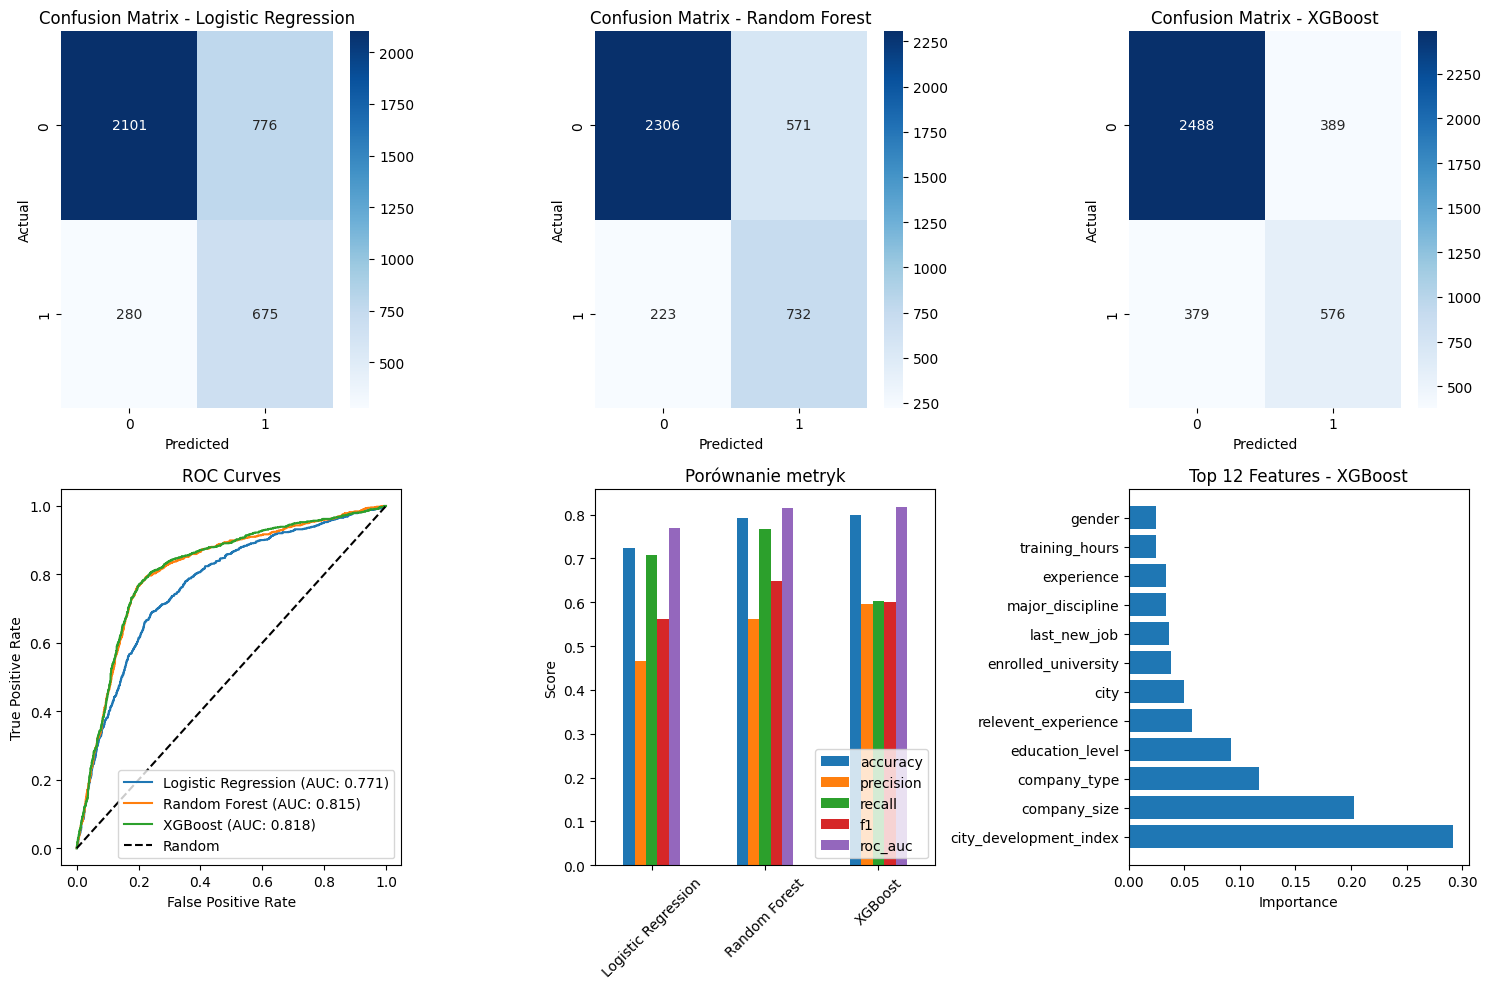


PREDYKCJE NA ZBIORZE TESTOWYM

Najlepszy model: XGBoost (ROC-AUC: 0.8178)

Predykcje zapisane do 'submission.csv'
Rozkład predykcji: {0: 0.76, 1: 0.24}

PODSUMOWANIE KOŃCOWE

Wyniki wszystkich modeli:
                     accuracy precision    recall        f1   roc_auc
Logistic Regression  0.724426  0.465196  0.706806  0.561097  0.770529
Random Forest        0.792797  0.561781  0.766492  0.648361   0.81468
XGBoost              0.799582  0.596891  0.603141       0.6  0.817848

🏆 NAJLEPSZY MODEL: XGBoost
   ROC-AUC: 0.8178
   F1-Score: 0.6000

Top 10 najważniejszych zmiennych:
  city_development_index    : 0.2916
  company_size              : 0.2026
  company_type              : 0.1176
  education_level           : 0.0923
  relevent_experience       : 0.0566
  city                      : 0.0500
  enrolled_university       : 0.0378
  last_new_job              : 0.0359
  major_discipline          : 0.0338
  experience                : 0.0333

✅ Modelowanie i ewaluacja zakończone!


In [ ]:
# ============================================================
# PRZYGOTOWANIE DANYCH DO MODELOWANIA
# ============================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Funkcja do przygotowania danych
def prepare_data_for_modeling(df_train, df_test):
    """Przygotowanie danych z encoding i imputacją"""
    
    # Kopia danych
    train = df_train.copy()
    test = df_test.copy()
    
    # Separacja target
    y_train = train['target']
    X_train = train.drop('target', axis=1)
    X_test = test.copy()
    
    # Lista zmiennych
    numerical_cols = ['city_development_index', 'training_hours']
    categorical_cols = [col for col in X_train.columns if col not in numerical_cols + ['enrollee_id']]
    
    # Imputacja braków
    for col in numerical_cols:
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        X_test[col].fillna(median_val, inplace=True)
    
    for col in categorical_cols:
        X_train[col].fillna('Missing', inplace=True)
        X_test[col].fillna('Missing', inplace=True)
    
    # Encoding zmiennych kategorycznych
    # Uporządkowane zmienne - manual encoding
    ordinal_mappings = {
        'education_level': {
            'Primary School': 1, 'High School': 2, 'Graduate': 3, 
            'Masters': 4, 'Phd': 5, 'Missing': 0
        },
        'experience': {
            '<1': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6,
            '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12,
            '13': 13, '14': 14, '15': 15, '16': 16, '17': 17,
            '18': 18, '19': 19, '20': 20, '>20': 21, 'Missing': -1
        },
        'company_size': {
            '<10': 1, '10-49': 2, '50-99': 3, '100-500': 4,
            '500-999': 5, '1000-4999': 6, '5000-9999': 7, 
            '10000+': 8, 'Missing': 0
        },
        'last_new_job': {
            'never': 0, '1': 1, '2': 2, '3': 3, '4': 4, '>4': 5, 'Missing': -1
        }
    }
    
    for col, mapping in ordinal_mappings.items():
        if col in X_train.columns:
            X_train[col] = X_train[col].map(lambda x: mapping.get(x, 0))
            X_test[col] = X_test[col].map(lambda x: mapping.get(x, 0))
    
    # Label encoding dla zmiennych binarnych i innych
    label_encoders = {}
    for col in categorical_cols:
        if col not in ordinal_mappings:
            le = LabelEncoder()
            # Fit na połączonych danych żeby mieć wszystkie kategorie
            combined = pd.concat([X_train[col], X_test[col]])
            le.fit(combined)
            X_train[col] = le.transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
            label_encoders[col] = le
    
    # Grupowanie rzadkich kategorii dla city (wysokiej kardynalności)
    if 'city' in X_train.columns:
        top_cities = X_train['city'].value_counts().head(30).index
        X_train['city'] = X_train['city'].apply(lambda x: x if x in top_cities else 999)
        X_test['city'] = X_test['city'].apply(lambda x: x if x in top_cities else 999)
    
    # Skalowanie zmiennych numerycznych
    scaler = StandardScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
    
    # Usunięcie enrollee_id
    if 'enrollee_id' in X_train.columns:
        X_train = X_train.drop('enrollee_id', axis=1)
    if 'enrollee_id' in X_test.columns:
        test_ids = X_test['enrollee_id']
        X_test = X_test.drop('enrollee_id', axis=1)
    else:
        test_ids = None
    
    return X_train, X_test, y_train, test_ids

# Przygotowanie danych
print("Przygotowanie danych...")
X, X_test_final, y, test_ids = prepare_data_for_modeling(df_training, df_test)

# Split na train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}")
print(f"Validation shape: {X_val.shape}")
print(f"Test shape: {X_test_final.shape}")
print(f"Target distribution - Train: {y_train.value_counts(normalize=True).round(3).to_dict()}")
print(f"Target distribution - Val: {y_val.value_counts(normalize=True).round(3).to_dict()}")

# ============================================================
# MODELOWANIE - RÓŻNE ALGORYTMY
# ============================================================

print("\n" + "="*60)
print("TRENOWANIE MODELI")
print("="*60)

# Słownik do przechowywania modeli i wyników
models = {}
results = {}

# 1. LOGISTIC REGRESSION
print("\n1. Logistic Regression...")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
models['Logistic Regression'] = lr

# 2. RANDOM FOREST
print("2. Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
models['Random Forest'] = rf

# 3. XGBOOST
print("3. XGBoost...")
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
models['XGBoost'] = xgb

# ============================================================
# WALIDACJA KRZYŻOWA
# ============================================================

print("\n" + "="*60)
print("WALIDACJA KRZYŻOWA (5-FOLD)")
print("="*60)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    # Różne metryki CV
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_roc_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    cv_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    
    results[name] = {
        'cv_accuracy': cv_accuracy.mean(),
        'cv_accuracy_std': cv_accuracy.std(),
        'cv_roc_auc': cv_roc_auc.mean(),
        'cv_roc_auc_std': cv_roc_auc.std(),
        'cv_f1': cv_f1.mean(),
        'cv_f1_std': cv_f1.std()
    }
    
    print(f"\n{name}:")
    print(f"  Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std():.4f})")
    print(f"  ROC-AUC:  {cv_roc_auc.mean():.4f} (+/- {cv_roc_auc.std():.4f})")
    print(f"  F1-Score: {cv_f1.mean():.4f} (+/- {cv_f1.std():.4f})")

# ============================================================
# TUNING HIPERPARAMETRÓW
# ============================================================

print("\n" + "="*60)
print("TUNING HIPERPARAMETRÓW (GRID SEARCH)")
print("="*60)

# Parametry do tuningu dla każdego modelu
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'class_weight': [None, 'balanced']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'class_weight': [None, 'balanced']
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 1.0]
    }
}

best_models = {}

for name in models.keys():
    print(f"\nTuning {name}...")
    
    if name == 'Logistic Regression':
        base_model = LogisticRegression(max_iter=1000, random_state=42)
    elif name == 'Random Forest':
        base_model = RandomForestClassifier(random_state=42, n_jobs=-1)
    else:  # XGBoost
        base_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    
    grid_search = GridSearchCV(
        base_model,
        param_grids[name],
        cv=3,  # Mniej foldów dla szybkości
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    
    print(f"  Najlepsze parametry: {grid_search.best_params_}")
    print(f"  Najlepszy ROC-AUC (CV): {grid_search.best_score_:.4f}")

# ============================================================
# EWALUACJA NA ZBIORZE WALIDACYJNYM
# ============================================================

print("\n" + "="*60)
print("EWALUACJA NA ZBIORZE WALIDACYJNYM")
print("="*60)

evaluation_results = {}

for name, model in best_models.items():
    # Predykcje
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Metryki
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    evaluation_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"\n{name}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")

# ============================================================
# WIZUALIZACJA WYNIKÓW (BEZPIECZNA WERSJA)
# ============================================================

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Confusion Matrices
for idx, (name, results) in enumerate(evaluation_results.items()):
    if idx < 3:  # Zabezpieczenie przed większą liczbą modeli
        ax = axes[0, idx]
        cm = confusion_matrix(y_val, results['y_pred'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'Confusion Matrix - {name}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')

# ROC Curves
from sklearn.metrics import roc_curve

ax = axes[1, 0]
for name, results in evaluation_results.items():
    fpr, tpr, _ = roc_curve(y_val, results['y_pred_proba'])
    ax.plot(fpr, tpr, label=f"{name} (AUC: {results['roc_auc']:.3f})")
ax.plot([0, 1], [0, 1], 'k--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.legend()

# Metryki - wykres słupkowy
ax = axes[1, 1]
metrics_df = pd.DataFrame(evaluation_results).T[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
metrics_df.plot(kind='bar', ax=ax)
ax.set_title('Porównanie metryk')
ax.set_ylabel('Score')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(loc='lower right')

# Feature Importance (dla najlepszego modelu) - POPRAWIONE
ax = axes[1, 2]
best_model_name = max(evaluation_results.items(), key=lambda x: x[1]['roc_auc'])[0]
best_model = best_models[best_model_name]

try:
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        n_features = len(importances)
        n_to_show = min(15, n_features)
        indices = np.argsort(importances)[::-1][:n_to_show]
        
        ax.barh(range(n_to_show), importances[indices])
        ax.set_yticks(range(n_to_show))
        ax.set_yticklabels([X.columns[i] for i in indices])
        ax.set_xlabel('Importance')
        ax.set_title(f'Top {n_to_show} Features - {best_model_name}')
    elif hasattr(best_model, 'coef_'):
        # Dla Logistic Regression
        coef = np.abs(best_model.coef_[0])
        n_features = len(coef)
        n_to_show = min(15, n_features)
        indices = np.argsort(coef)[::-1][:n_to_show]
        
        ax.barh(range(n_to_show), coef[indices])
        ax.set_yticks(range(n_to_show))
        ax.set_yticklabels([X.columns[i] for i in indices])
        ax.set_xlabel('|Coefficient|')
        ax.set_title(f'Top {n_to_show} Features - {best_model_name}')
    else:
        ax.text(0.5, 0.5, 'Feature importance\nnot available', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'Feature Importance - {best_model_name}')
except Exception as e:
    ax.text(0.5, 0.5, f'Error plotting\nfeature importance:\n{str(e)[:50]}', 
            ha='center', va='center', transform=ax.transAxes, fontsize=10)
    ax.set_title('Feature Importance - Error')

plt.tight_layout()
plt.show()

# ============================================================
# PREDYKCJE NA ZBIORZE TESTOWYM
# ============================================================

print("\n" + "="*60)
print("PREDYKCJE NA ZBIORZE TESTOWYM")
print("="*60)

# Wybór najlepszego modelu
best_model_name = max(evaluation_results.items(), key=lambda x: x[1]['roc_auc'])[0]
best_model = best_models[best_model_name]

print(f"\nNajlepszy model: {best_model_name} (ROC-AUC: {evaluation_results[best_model_name]['roc_auc']:.4f})")

# Predykcje
test_predictions = best_model.predict(X_test_final)
test_probabilities = best_model.predict_proba(X_test_final)[:, 1]

# Przygotowanie submission
if test_ids is not None:
    submission = pd.DataFrame({
        'enrollee_id': test_ids,
        'target': test_predictions,
        'target_probability': test_probabilities
    })
    
    # Zapisz do CSV
    submission[['enrollee_id', 'target']].to_csv('submission.csv', index=False)
    print(f"\nPredykcje zapisane do 'submission.csv'")
    print(f"Rozkład predykcji: {pd.Series(test_predictions).value_counts(normalize=True).round(3).to_dict()}")

# ============================================================
# PODSUMOWANIE KOŃCOWE
# ============================================================

print("\n" + "="*60)
print("PODSUMOWANIE KOŃCOWE")
print("="*60)

# Tabela z wynikami
results_summary = pd.DataFrame(evaluation_results).T[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
results_summary = results_summary.round(4)

print("\nWyniki wszystkich modeli:")
print(results_summary)

print("\n NAJLEPSZY MODEL:", best_model_name)
print(f"   ROC-AUC: {evaluation_results[best_model_name]['roc_auc']:.4f}")
print(f"   F1-Score: {evaluation_results[best_model_name]['f1']:.4f}")

# Top 10 najważniejszych zmiennych
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 najważniejszych zmiennych:")
    for idx, row in feature_importance.head(10).iterrows():
        print(f"  {row['feature']:25} : {row['importance']:.4f}")

print("\n Modelowanie i ewaluacja zakończone!")